In this code, we try to predict MOOD of student wellness group from sleep analysis dataset. Later on, we will also include the interaction of features, if it is approved as a part of analysis. This prediction should be done for different cases in which the MOOD is predicted by including all the sleep variables along with total activity, as well as picking the principal components, or components from UMAP etc. Later on, we will also include heart rate, or some derived features from heart rate to include in the prediction.

In [440]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.dimred import CORE
from scipy.linalg import eigh
from matplotlib.patches import Ellipse
from scipy.stats.distributions import chi2
from statsmodels.nonparametric.smoothers_lowess import lowess

In [441]:
df_sleep = pd.read_csv(r'C:\Users\rajnishk\OneDrive - Michigan Medicine\Documents\Student Wellness Dataset\student_wellness_sleep_details.csv',
                 parse_dates=["SLEEP_DATE","SLEEP_START_DATE", "SLEEP_END_DATE"],index_col=0)
# df_sleep

In [442]:
df_sleep

SLEEP_SUMMARY_ID STUDY_PRTCPT_ID  STUDY_ID SLEEP_DATE  \
0              2959479        XGJ8AFS8       401 2023-01-21   
1              2963634        XGJ8AFS8       401 2023-01-22   
2              2967254        XGJ8AFS8       401 2023-01-23   
3              2971501        XGJ8AFS8       401 2023-01-24   
4              3534523        XGJ8AFS8       401 2023-06-09   
...                ...             ...       ...        ...   
2260           3384475        JU3R5P4M       401 2023-05-02   
2261           3389144        JU3R5P4M       401 2023-05-03   
2262           3389143        JU3R5P4M       401 2023-05-03   
2263           3393928        JU3R5P4M       401 2023-05-04   
2264           3397617        JU3R5P4M       401 2023-05-05   

        SLEEP_START_DATE      SLEEP_END_DATE  ASLEEP_VALUE  INBED_VALUE  \
0    2023-01-20 20:08:00 2023-01-21 05:48:30           485          580   
1    2023-01-21 20:33:30 2023-01-22 07:55:30           587          682   
2    2023-01-22 19:37:30 2023-01-23 07:07:30           561          690   
3    2023-01-23 21:34:00 2023-01-24 06:02:30           458          508   
4    2023-06-09 12:02:30 2023-06-09 13:05:30            60           63   
...                  ...                 ...           ...          ...   
2260 2023-05-02 01:58:00 2023-05-02 10:00:00           413          482   
2261 2023-05-03 02:30:00 2023-05-03 08:25:30           303          355   
2262 2023-05-03 15:18:00 2023-05-03 18:55:00           191          217   
2263 2023-05-04 05:24:00 2023-05-04 12:25:30           346          421   
2264 2023-05-05 03:23:00 2023-05-05 10:20:30           345          417   

      DEEP_MIN  DEEP_COUNT  ...  REM_COUNT  WAKE_MIN  WAKE_COUNT  ASLEEP_MIN  \
0         67.0         5.0  ...        9.0      95.0        28.0         NaN   
1         59.0         6.0  ...        8.0      95.0        40.0         NaN   
2         71.0         5.0  ...        7.0     129.0        37.0         NaN   
3         91.0         4.0  ...       11.0      50.0        33.0         NaN   
4          NaN         NaN  ...        NaN       NaN         NaN        60.0   
...        ...         ...  ...        ...       ...         ...         ...   
2260      65.0         3.0  ...        8.0      69.0        36.0         NaN   
2261      64.0         4.0  ...        5.0      52.0        15.0         NaN   
2262      25.0         1.0  ...        1.0      26.0        20.0         NaN   
2263      65.0         3.0  ...        2.0      75.0        21.0         NaN   
2264      48.0         5.0  ...        4.0      72.0        31.0         NaN   

      ASLEEP_COUNT  AWAKE_COUNT  AWAKE_MIN  RESTLESS_COUNT  RESTLESS_MIN  \
0              NaN          NaN        NaN             NaN           NaN   
1              NaN          NaN        NaN             NaN           NaN   
2              NaN          NaN        NaN             NaN           NaN   
3              NaN          NaN        NaN             NaN           NaN   
4              0.0          0.0        0.0             3.0           3.0   
...            ...          ...        ...             ...           ...   
2260           NaN          NaN        NaN             NaN           NaN   
2261           NaN          NaN        NaN             NaN           NaN   
2262           NaN          NaN        NaN             NaN           NaN   
2263           NaN          NaN        NaN             NaN           NaN   
2264           NaN          NaN        NaN             NaN           NaN   

         TYPE  
0      stages  
1      stages  
2      stages  
3      stages  
4     classic  
...       ...  
2260   stages  
2261   stages  
2262   stages  
2263   stages  
2264   stages  

[2265 rows x 23 columns]

In [443]:
# df_sleep_stages = df[df.TYPE=='stages']
# df_sleep_stages=df_sleep_stages.drop('Unnamed: 0', axis = 0)

In [444]:
df_MOOD = pd.read_csv(r'C:\Users\rajnishk\OneDrive - Michigan Medicine\Documents\Student Wellness Dataset\df_MOOD_SWG.csv', 
                     parse_dates=["METRIC_START_DATE", "METRIC_END_DATE"],index_col=0)

In [445]:
# df_MOOD

In [446]:
df_MOOD.rename(columns={'METRIC_START_DATE': 'SLEEP_DATE'}, inplace=True) # So that I can merge two dataframes. 
df_MOOD

STUDY_METRIC_AGGREGATE_ID STUDY_PRTCPT_ID  STUDY_ID  STEP_COUNT  \
0                       4024199        XGJ8AFS8       401        1131   
1                       4025733        XGJ8AFS8       401        6957   
2                       4031073        XGJ8AFS8       401        7395   
3                       4036413        XGJ8AFS8       401        7039   
4                       4041773        XGJ8AFS8       401        6257   
...                         ...             ...       ...         ...   
6146                    5425225        JU3R5P4M       401           0   
6147                    5430705        JU3R5P4M       401           0   
6148                    5436166        JU3R5P4M       401           0   
6149                    5441625        JU3R5P4M       401           0   
6150                    5447085        JU3R5P4M       401           0   

      SLEEP_COUNT  MOOD SLEEP_DATE METRIC_END_DATE  
0               0     6 2023-01-20      2023-01-20  
1             485     7 2023-01-21      2023-01-21  
2             587     8 2023-01-22      2023-01-22  
3             561     7 2023-01-23      2023-01-23  
4             458     7 2023-01-24      2023-01-24  
...           ...   ...        ...             ...  
6146            0     0 2023-10-03      2023-10-03  
6147            0     0 2023-10-04      2023-10-04  
6148            0     0 2023-10-05      2023-10-05  
6149            0     0 2023-10-06      2023-10-06  
6150            0     0 2023-10-07      2023-10-07  

[6151 rows x 8 columns]

In [447]:
print("Number of non-zero observations of MOOD in the dataset is", np.shape(df_MOOD[df_MOOD['MOOD']!=0])[0])
print("Number of measurements in uncleaned MOOD dataset, df_MOOD is", np.shape(df_MOOD)[0])
print("Number of measurements in uncleaned sleep dataset, df_sleep is", np.shape(df_sleep)[0])
df_sleep.columns

Number of non-zero observations of MOOD in the dataset is 740
Number of measurements in uncleaned MOOD dataset, df_MOOD is 6151
Number of measurements in uncleaned sleep dataset, df_sleep is 2265


Index(['SLEEP_SUMMARY_ID', 'STUDY_PRTCPT_ID', 'STUDY_ID', 'SLEEP_DATE',
       'SLEEP_START_DATE', 'SLEEP_END_DATE', 'ASLEEP_VALUE', 'INBED_VALUE',
       'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN', 'LIGHT_COUNT', 'REM_MIN',
       'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT', 'ASLEEP_MIN', 'ASLEEP_COUNT',
       'AWAKE_COUNT', 'AWAKE_MIN', 'RESTLESS_COUNT', 'RESTLESS_MIN', 'TYPE'],
      dtype='object')

df_MOOD_sleep is derived based on an inner joint, and there would be several days where MOOD data is present, but sleep details are not. It loses those days, e.g. MOOD on 4/2/2023 for JU3R5P4M is present


In [448]:
df_MOOD_sleep = pd.merge(df_sleep,df_MOOD, on = ['STUDY_PRTCPT_ID','SLEEP_DATE'], how = 'inner' ) 


In [449]:
df_MOOD_sleep.columns

Index(['SLEEP_SUMMARY_ID', 'STUDY_PRTCPT_ID', 'STUDY_ID_x', 'SLEEP_DATE',
       'SLEEP_START_DATE', 'SLEEP_END_DATE', 'ASLEEP_VALUE', 'INBED_VALUE',
       'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN', 'LIGHT_COUNT', 'REM_MIN',
       'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT', 'ASLEEP_MIN', 'ASLEEP_COUNT',
       'AWAKE_COUNT', 'AWAKE_MIN', 'RESTLESS_COUNT', 'RESTLESS_MIN', 'TYPE',
       'STUDY_METRIC_AGGREGATE_ID', 'STUDY_ID_y', 'STEP_COUNT', 'SLEEP_COUNT',
       'MOOD', 'METRIC_END_DATE'],
      dtype='object')

In [450]:
np.shape(df_MOOD_sleep)

(2265, 29)

In [451]:
non_zero_MOOD_count = (df_MOOD['MOOD'] != 0).sum()
non_zero_MOOD_count

740

In [452]:
sleep_vars = ['ASLEEP_VALUE', 'INBED_VALUE', 'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN', 'LIGHT_COUNT', 
              'REM_MIN', 'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT', 'ASLEEP_MIN', 'ASLEEP_COUNT', 
              'AWAKE_COUNT', 'AWAKE_MIN', 'RESTLESS_COUNT', 'RESTLESS_MIN']
v = df_sleep[sleep_vars].isna().sum(0)
v = v[v < 500].index.tolist()
vv = ["STUDY_PRTCPT_ID", "SLEEP_START_DATE", "SLEEP_END_DATE", "SLEEP_DATE"] + v
dx = df_sleep[vv].copy()
dx["YEARDAY"] = dx["SLEEP_DATE"].dt.dayofyear
dx["DAYOFWEEK"] = dx["SLEEP_DATE"].dt.dayofweek
dx["SLEEP_START_TIME"] = (dx["SLEEP_START_DATE"] - dx["SLEEP_START_DATE"].dt.normalize()) / pd.Timedelta(hours=1)
dx["SLEEP_END_TIME"] = (dx["SLEEP_END_DATE"] - dx["SLEEP_END_DATE"].dt.normalize()) / pd.Timedelta(hours=1)
dx["SLEEP_START_SIN"] = np.sin(2*np.pi*dx["SLEEP_START_TIME"]/24)
dx["SLEEP_START_COS"] = np.cos(2*np.pi*dx["SLEEP_START_TIME"]/24)
dx["SLEEP_END_SIN"] = np.sin(2*np.pi*dx["SLEEP_END_TIME"]/24)
dx["SLEEP_END_COS"] = np.cos(2*np.pi*dx["SLEEP_END_TIME"]/24)
dx["YEARDAY_SIN"] = np.sin(2*np.pi*dx["YEARDAY"]/366)
dx["YEARDAY_COS"] = np.cos(2*np.pi*dx["YEARDAY"]/366)

# #===============================================================================================
# dx["SLEEP_START_TIME"] = (dx["SLEEP_START_DATE"] - dx["SLEEP_START_DATE"].dt.normalize()) / pd.Timedelta(hours=1)
# plt.scatter(dx["SLEEP_START_TIME"],dx["SLEEP_START_SIN"] )
# #===============================================================================================


dx["STUDYDAY"] = dx["YEARDAY"] - dx.groupby("STUDY_PRTCPT_ID")["YEARDAY"].transform(np.min)
# dx = dx.drop(columns=["SLEEP_START_DATE", "SLEEP_END_DATE", "SLEEP_START_TIME", "SLEEP_END_TIME", "SLEEP_DATE"])
dx = dx.dropna()
dx.columns

C:\Users\rajnishk\AppData\Local\Temp\ipykernel_9656\1850505678.py:25: FutureWarning: The provided callable <function min at 0x000001C268BCF600> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dx["STUDYDAY"] = dx["YEARDAY"] - dx.groupby("STUDY_PRTCPT_ID")["YEARDAY"].transform(np.min)


Index(['STUDY_PRTCPT_ID', 'SLEEP_START_DATE', 'SLEEP_END_DATE', 'SLEEP_DATE',
       'ASLEEP_VALUE', 'INBED_VALUE', 'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN',
       'LIGHT_COUNT', 'REM_MIN', 'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT',
       'YEARDAY', 'DAYOFWEEK', 'SLEEP_START_TIME', 'SLEEP_END_TIME',
       'SLEEP_START_SIN', 'SLEEP_START_COS', 'SLEEP_END_SIN', 'SLEEP_END_COS',
       'YEARDAY_SIN', 'YEARDAY_COS', 'STUDYDAY'],
      dtype='object')

In [453]:
df_MOOD_sleep_polar = pd.merge(dx,df_MOOD, on = ['STUDY_PRTCPT_ID','SLEEP_DATE'], how = 'inner' )
print("Number of measurements for both MOOD and sleep is", np.shape(df_MOOD_sleep_polar)[0])
df_MOOD_sleep_polar_MOOD_NZ = df_MOOD_sleep_polar[df_MOOD_sleep_polar.MOOD !=0]   # Lots of data goes away.

Number of measurements for both MOOD and sleep is 1810


In [454]:
np.shape(df_MOOD_sleep_polar_MOOD_NZ)

(478, 31)

In [455]:
df_MOOD_sleep_polar_MOOD_NZ.STUDY_PRTCPT_ID.unique()

array(['XGJ8AFS8', '1X8MBFBA', 'F1MALNM8', 'IS69SBYZ', 'D1C3M5J2',
       'W7LX2I74', 'JEW6KQY3', 'KL8ZU5XC', 'XKZF8SDS', '8MRVHIRR',
       'YRTQ7TKL', '15LGWNGJ', 'Y8PEMP7K', 'VL61MMTY', 'RQ5P4ZR8',
       'T4CSRKVM', 'M5ENQMEA', 'SBTLFFUR', 'CCD84K8N', 'UQUEK1XU',
       'VZK8IVKE', 'TQLY4RDR', 'MLYS5U85', '3IJBZPI8', 'JU3R5P4M'],
      dtype=object)

Standardize the sleep, and total steps variables.
The polar variables got ignored by mistake. I will come back to it and include them later.

In [456]:

include_columns = [
       'ASLEEP_VALUE', 'INBED_VALUE', 'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN',
       'LIGHT_COUNT', 'REM_MIN', 'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT', 'STEP_COUNT', 'SLEEP_COUNT','SLEEP_END_SIN', 'SLEEP_END_COS', 'MOOD']
va = [x for x in include_columns]
print(va)
df_MOOD_sleep_polar_MOOD_NZ_norm = df_MOOD_sleep_polar_MOOD_NZ.copy()
df_MOOD_sleep_polar_MOOD_NZ_norm[va] = df_MOOD_sleep_polar_MOOD_NZ_norm[va] - df_MOOD_sleep_polar_MOOD_NZ_norm[va].mean(0)
df_MOOD_sleep_polar_MOOD_NZ_norm[va] = df_MOOD_sleep_polar_MOOD_NZ_norm[va] / df_MOOD_sleep_polar_MOOD_NZ_norm[va].std(0)
# df_MOOD_sleep_polar_MOOD_NZ.loc[:, include_columns] = df_MOOD_sleep_polar_MOOD_NZ.loc[:, include_columns] - df_MOOD_sleep_polar_MOOD_NZ[include_columns].mean(0)
# df_MOOD_sleep_polar_MOOD_NZ.loc[:, include_columns] = df_MOOD_sleep_polar_MOOD_NZ.loc[:, include_columns] / df_MOOD_sleep_polar_MOOD_NZ[include_columns].std(0)
print("Confirm if standardizing MOOD is okay. It should be okay for correlation heat map and dimensionality reduction,but will check again for normalizing of MOOD as an outcome in prediction models.")

['ASLEEP_VALUE', 'INBED_VALUE', 'DEEP_MIN', 'DEEP_COUNT', 'LIGHT_MIN', 'LIGHT_COUNT', 'REM_MIN', 'REM_COUNT', 'WAKE_MIN', 'WAKE_COUNT', 'STEP_COUNT', 'SLEEP_COUNT', 'SLEEP_END_SIN', 'SLEEP_END_COS', 'MOOD']
Confirm if standardizing MOOD is okay. It should be okay for correlation heat map and dimensionality reduction,but will check again for normalizing of MOOD as an outcome in prediction models.


In [457]:
# df_MOOD_sleep_polar_MOOD_NZ.dtypes
print("Number of measurements for sleep and Non Zero MOOD values",np.shape(df_MOOD_sleep_polar_MOOD_NZ)[0])

Number of measurements for sleep and Non Zero MOOD values 478


In [458]:
# df_MOOD_sleep_polar_MOOD_NZ_norm

<Axes: >

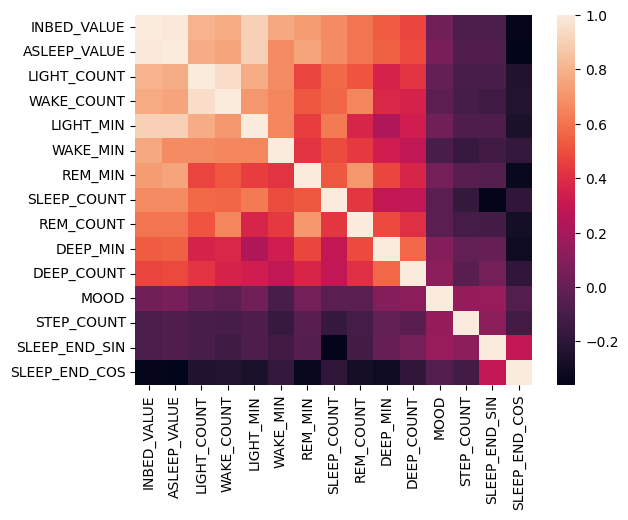

In [459]:
# Plot a correlation heat map on the standardized variables
X = df_MOOD_sleep_polar_MOOD_NZ_norm[include_columns].copy()
X0 = X - X.mean(0) # MEAN SHOULD BE ZERO ANYWAY. 
C = X0.corr()
a,b = eigh(C)
ii = np.argmax(a)
jj = np.argsort(b[:, ii])
X0 = X0.iloc[:, jj]
sns.heatmap(X0.corr())

In [460]:
# I just noticed, I should remove the sleep end sin and cos terms, because they are "engineered" and not measured. It would still help 
# to talk about the correlation of wake up time with other features that were measured directly.

#Polynomial featres -- In another notebook

In [461]:
#Ratio of features as a part of feature engineering -- In another notebook-- Is it advisable in case of multicolinearity? As we can see several sleep variables
# have a value of higher than 0.6-0.7 in the correlation heatmap.
# I will do it anyway, because even in case of BMI, weight and height are supposed to be correlated. 

# Regression Model to predict MOOD from Sleep variables and overall activity

# Put Multinomial distribution

In [462]:
# for name in vars().keys():
#     if name.find('df') !=-1:
#        print(name)

In [463]:
# type(name)

df_MOOD_sleep_polar_MOOD_NZ_reg_X_Y will be used to implement logistic regression X,Y represent indepenedent and dependent variables in the regression

In [464]:
df_MOOD_sleep_polar_MOOD_NZ_4_regression = df_MOOD_sleep_polar_MOOD_NZ.copy()      

In [465]:
X_columns = [col for col in include_columns if col != 'MOOD']
Y_columns = 'MOOD'

In [466]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [467]:
df_MOOD_sleep_polar_MOOD_NZ_4_regression[X_columns] = df_MOOD_sleep_polar_MOOD_NZ_norm[X_columns]
df_MOOD_sleep_polar_MOOD_NZ_4_regression[Y_columns] = df_MOOD_sleep_polar_MOOD_NZ[Y_columns]
X = df_MOOD_sleep_polar_MOOD_NZ_4_regression[X_columns]
Y = df_MOOD_sleep_polar_MOOD_NZ_4_regression[Y_columns]

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Train/test split

In [469]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='ovr')
# model = LogisticRegression()
model.fit(X_train, y_train)  # Fit the model

LogisticRegression(max_iter=1000, multi_class='ovr')

In [470]:
np.shape(model.coef_)


(10, 14)

In [471]:
y_pred = model.predict(X_test) # prediction
# y_pred

In [472]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.23958333333333334
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.50      0.50      0.50         2
           5       0.40      0.15      0.22        13
           6       0.24      0.39      0.30        23
           7       0.29      0.23      0.26        26
           8       0.18      0.31      0.23        16
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         3

    accuracy                           0.24        96
   macro avg       0.18      0.18      0.17        96
weighted avg       0.23      0.24      0.22        96



C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_analysis\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_analysis\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_analysis\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [473]:
y_pred_train = model.predict(X_train)

In [474]:
# Checking model on training data itself 
print('Accuracy on training dataset itself:', accuracy_score(y_train, y_pred_train))
print('classification report on training data itself \n')
print(classification_report(y_train,y_pred_train))

Accuracy on training dataset itself: 0.3193717277486911
classification report on training data itself 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        10
           3       0.50      0.12      0.20        16
           4       0.18      0.07      0.10        28
           5       0.37      0.24      0.29        42
           6       0.29      0.32      0.30        76
           7       0.31      0.41      0.35        81
           8       0.33      0.55      0.41        83
           9       0.43      0.09      0.15        34
          10       1.00      0.25      0.40         8

    accuracy                           0.32       382
   macro avg       0.34      0.21      0.22       382
weighted avg       0.33      0.32      0.29       382



C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_analysis\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_analysis\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_analysis\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [475]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm_test)


Confusion Matrix:
[[ 0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  1  1  0  0]
 [ 0  0  1  0  1  0  0  0  0]
 [ 0  0  0  2  5  4  2  0  0]
 [ 0  0  0  1  9  6  6  0  1]
 [ 0  0  0  2 11  6  6  1  0]
 [ 0  0  1  0  9  1  5  0  0]
 [ 0  0  0  0  1  2  6  0  0]
 [ 0  0  0  0  1  1  1  0  0]]


In [476]:
# CUMULATIVE EFFECT OVER 3-4 DAYS. 

In [477]:
class_labels_test = [2,3,4,5,6,7,8,9,10]

<Figure size 1000x800 with 0 Axes>

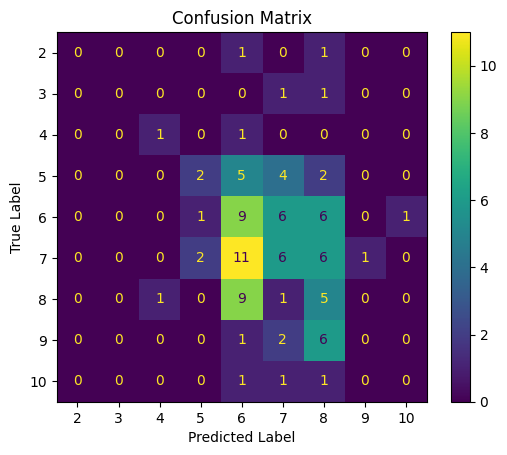

In [478]:

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [479]:
cm_train = confusion_matrix(y_train,y_pred_train)
print("\n confusion matrix on training data itself:")
print(cm_train)


 confusion matrix on training data itself:
[[ 0  0  0  0  0  1  2  1  0  0]
 [ 0  0  0  0  1  2  5  2  0  0]
 [ 0  0  2  1  1  4  3  4  1  0]
 [ 0  1  0  2  5  6  8  6  0  0]
 [ 0  0  0  3 10 12  5 11  1  0]
 [ 0  0  1  2  5 24 18 26  0  0]
 [ 0  0  0  2  2 14 33 29  1  0]
 [ 0  0  0  1  0 13 22 46  1  0]
 [ 0  0  1  0  3  4  9 14  3  0]
 [ 0  0  0  0  0  2  2  2  0  2]]


In [516]:
# mooD ON LINEAR REGRESSION
# CODE SLEEP ON PREVIOUS DAYS  (IMPUTATION PLUS PCA)
# MIXED MODELS.(CLUSTERING BASED ON IDS)         -- Mixed Effect Regression

In [480]:
class_labels_train = [ 1,  2, 3,   4, 5,   6,  7, 8, 9, 10]

<Figure size 1000x800 with 0 Axes>

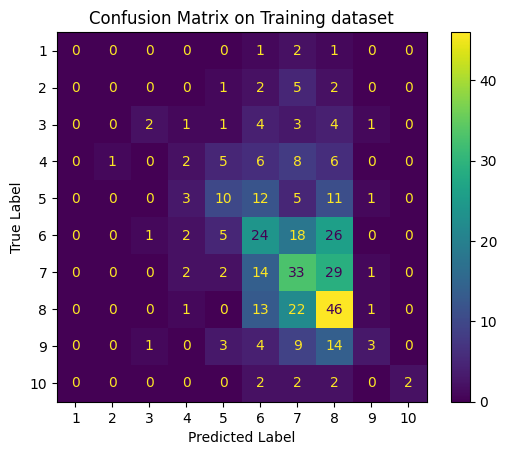

In [481]:

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels_train)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot()
plt.title('Confusion Matrix on Training dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [482]:
y_train.unique()

array([ 5,  8,  7, 10,  6,  4,  9,  3,  2,  1], dtype=int64)

In [483]:
y_train.value_counts()

MOOD
8     83
7     81
6     76
5     42
9     34
4     28
3     16
2     10
10     8
1      4
Name: count, dtype: int64

In [484]:
y_test.value_counts()

MOOD
7     26
6     23
8     16
5     13
9      9
10     3
4      2
2      2
3      2
Name: count, dtype: int64

Text(0.5, 1.0, 'MOOD distribution for training set')

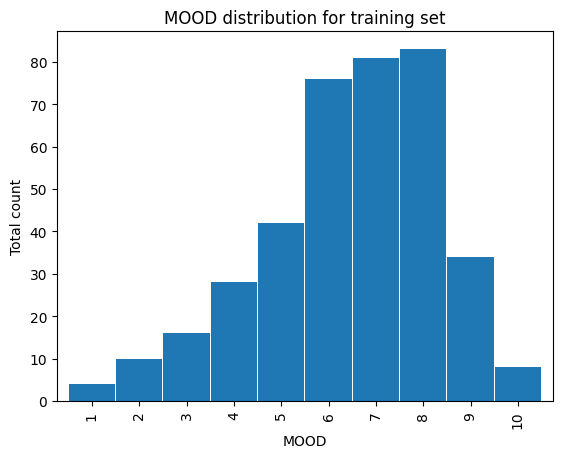

In [485]:
# y_train.hist()
category_order = [1,2,3,4,5,6,7,8,9,10]
y_train.value_counts().reindex(category_order).plot(kind = 'bar', width = 0.98)
plt.xlabel('MOOD')
plt.ylabel('Total count')
plt.title('MOOD distribution for training set')

Text(0.5, 1.0, 'MOOD distribution for test set')

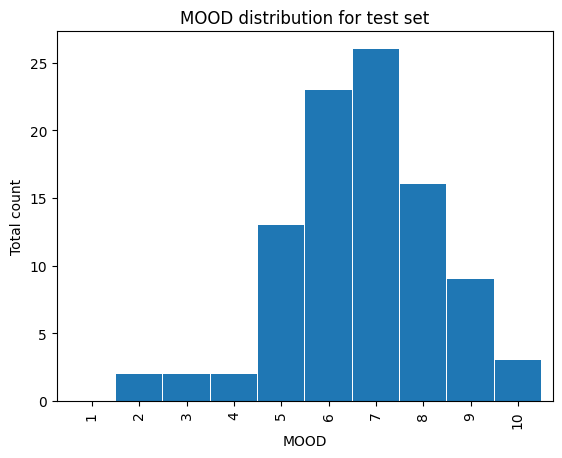

In [486]:
# y_train.hist()
category_order = [1,2,3,4,5,6,7,8,9,10]
y_test.value_counts().reindex(category_order).plot(kind = 'bar',width = 0.98)
plt.xlabel('MOOD')
plt.ylabel('Total count')
plt.title('MOOD distribution for test set')

Text(0.5, 1.0, 'MOOD distribution for test set')

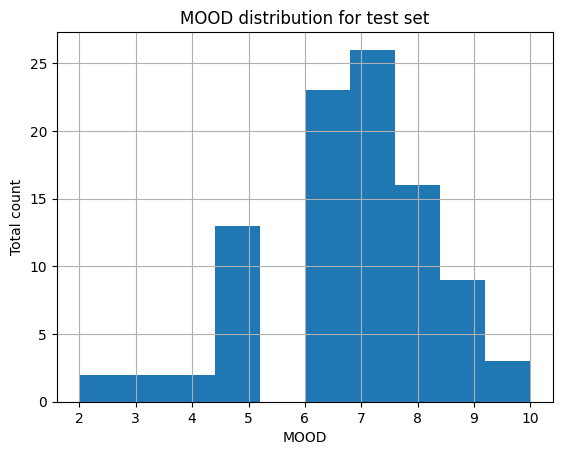

In [487]:
y_test.hist()
plt.xlabel('MOOD')
plt.ylabel('Total count')
plt.title('MOOD distribution for test set')

In [488]:
y_train.value_counts()

MOOD
8     83
7     81
6     76
5     42
9     34
4     28
3     16
2     10
10     8
1      4
Name: count, dtype: int64

EEP_END_COS'], object(1)
memory usage: 113.9+ KB


In [489]:
df_MOOD_sleep_polar_MOOD_NZ_4_regression

STUDY_PRTCPT_ID    SLEEP_START_DATE      SLEEP_END_DATE SLEEP_DATE  \
0           XGJ8AFS8 2023-01-20 20:08:00 2023-01-21 05:48:30 2023-01-21   
1           XGJ8AFS8 2023-01-21 20:33:30 2023-01-22 07:55:30 2023-01-22   
2           XGJ8AFS8 2023-01-22 19:37:30 2023-01-23 07:07:30 2023-01-23   
3           XGJ8AFS8 2023-01-23 21:34:00 2023-01-24 06:02:30 2023-01-24   
4           XGJ8AFS8 2023-01-24 20:20:30 2023-01-25 06:32:00 2023-01-25   
...              ...                 ...                 ...        ...   
1779        3IJBZPI8 2023-04-13 23:23:00 2023-04-14 07:01:00 2023-04-14   
1787        JU3R5P4M 2023-03-28 00:14:30 2023-03-28 05:33:30 2023-03-28   
1788        JU3R5P4M 2023-03-29 01:38:30 2023-03-29 11:21:30 2023-03-29   
1789        JU3R5P4M 2023-04-01 02:17:00 2023-04-01 18:04:00 2023-04-01   
1790        JU3R5P4M 2023-04-02 05:21:00 2023-04-02 10:06:30 2023-04-02   

      ASLEEP_VALUE  INBED_VALUE  DEEP_MIN  DEEP_COUNT  LIGHT_MIN  LIGHT_COUNT  \
0         0.673706     0.844594 -0.079295    0.954446   0.867428    -0.151096   
1         1.544407     1.603654 -0.375125    1.618529   2.123036     1.387767   
2         1.322464     1.663188  0.068619    0.954446   1.769515     1.387767   
3         0.443226     0.308787  0.808193    0.290363  -0.071229     0.464449   
4         0.733460     1.075288 -0.929805    0.290363   1.355043     0.361858   
...            ...          ...       ...         ...        ...          ...   
1779     -0.068951    -0.063302 -1.114699    1.618529   0.964951     0.669631   
1787     -1.221350    -1.097707 -1.706358   -1.037803  -0.729509    -0.766641   
1788      0.639561     0.866919 -0.486061   -1.037803   1.720754     2.105903   
1789      2.833387     3.575722  1.288917    1.618529   4.561108     3.747357   
1790     -1.315249    -1.350727 -0.855848    0.290363  -1.046458    -1.074414   

      ...  SLEEP_END_COS  YEARDAY_SIN  YEARDAY_COS  STUDYDAY  \
0     ...       1.268398     0.352752     0.935717         0   
1     ...      -0.001454     0.368763     0.929523         1   
2     ...       0.457396     0.384665     0.923056         2   
3     ...       1.122928     0.400454     0.916317         3   
4     ...       0.817375     0.416125     0.909308         4   
...   ...            ...          ...          ...       ...   
1779  ...       0.522319     0.977064    -0.212947        43   
1787  ...       1.423750     0.997018     0.077175         1   
1788  ...      -1.199758     0.998195     0.060049         2   
1789  ...       1.190489     0.999963     0.008583         5   
1790  ...      -0.947084     0.999963    -0.008583         6   

      STUDY_METRIC_AGGREGATE_ID  STUDY_ID  STEP_COUNT  SLEEP_COUNT  MOOD  \
0                       4025733       401   -0.148212     0.314335     7   
1                       4031073       401   -0.055628     1.214312     8   
2                       4036413       401   -0.130879     0.984906     7   
3                       4041773       401   -0.296177     0.076106     7   
4                       4047133       401   -0.813634     0.376098     7   
...                         ...       ...         ...          ...   ...   
1779                    4476751       401   -1.594469    -0.453293     7   
1787                    4380458       401   -0.619165    -1.644439     2   
1788                    4385858       401   -1.289871     0.279042     4   
1789                    4402280       401   -1.317774     2.546631     3   
1790                    4407680       401   -1.041289    -1.741495     2   

      METRIC_END_DATE  
0          2023-01-21  
1          2023-01-22  
2          2023-01-23  
3          2023-01-24  
4          2023-01-25  
...               ...  
1779       2023-04-14  
1787       2023-03-28  
1788       2023-03-29  
1789       2023-04-01  
1790       2023-04-02  

[478 rows x 31 columns]

In [490]:
# X_columns

# Ratio  of features (e.g. BMI)

# PCA/biplots

In [491]:
def plot_eigs(eigs):
    jj = np.arange(1, len(eigs) + 1)
    ii = np.flatnonzero(eigs >= 1e-10)
    plt.clf()
    plt.grid(True)
    # plt.plot(np.log(jj[ii]), np.log(eigs[ii]), "-o")
    plt.plot((jj[ii]), (eigs[ii]), "-o")
    plt.ylabel("eigenvalue", size=15)
    plt.xlabel("position", size=15)    

    # plt.ylabel("Log eigenvalue", size=15)
    # plt.xlabel("Log position", size=15)
    plt.show()

In [492]:
def varimax(X, eps=1e-05, maxiter=1000):
    G = X.copy()
    m, p = G.shape
    Q = np.eye(p)
    if p < 2: 
        return G, Q
    d = 0.0
    for i in range(maxiter):
        z = np.dot(G, Q)
        cs = (z**2).sum(0)
        B = np.dot(G.T, z**3 - z * (cs / m))
        u, s, vt = np.linalg.svd(B, 0)
        Q = np.dot(u, vt)
        dlast = d
        d = s.sum()
        if d < dlast * (1 + eps): 
            break
            
    G = np.dot(G, Q)
    return G, Q

In [493]:
def ellipse_plot(U, idx, j0, j1):
    r2 = chi2(2).ppf(0.95)
    rr = np.sqrt(r2)
    dx = pd.DataFrame({"u0": U[:, 0], "u1": U[:, 1], "id": idx})
    plt.clf()
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    plt.plot(dx["u0"], dx["u1"], "o", color="black", alpha=0.05)
    for (ky,dg) in dx.groupby("id"):
        if dg.shape[0] > 10:
            m0, m1 = dg["u0"].mean(), dg["u1"].mean()
            C = np.cov(dg["u0"], dg["u1"])
            a, b = eigh(C)
            plt.plot([m0], [m1], "o", color="blue", ms=8, alpha=0.2)
            ang = np.arctan2(b[1, 1], b[0, 1])*360/(2*np.pi)
            E = Ellipse(xy=[m0,m1], width=rr*np.sqrt(a[1]), height=rr*np.sqrt(a[0]), fc="none", ec="black", angle=ang)
            plt.gca().add_artist(E)
            
    plt.xlabel("Component %d" % j0, size=17)
    plt.ylabel("Component %d" % j1, size=17)
    plt.show()

In [494]:
def ellipse_plot_MOOD_categories(U, idx, j0, j1):
    r2 = chi2(2).ppf(0.95)
    rr = np.sqrt(r2)
    dx = pd.DataFrame({"u0": U[:, 0], "u1": U[:, 1], "id": idx})
    plt.clf()
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    plt.plot(dx["u0"], dx["u1"], "o", color="black", alpha=0.05)
    for (ky,dg) in dx.groupby("id"):
        print ("this is variable ky %s" %ky)
        
        if dg.shape[0] > 10:
            m0, m1 = dg["u0"].mean(), dg["u1"].mean()
            C = np.cov(dg["u0"], dg["u1"])
            a, b = eigh(C)
            plt.plot([m0], [m1], "o", color="blue", ms=8, alpha=0.2)
            ang = np.arctan2(b[1, 1], b[0, 1])*360/(2*np.pi)
            E = Ellipse(xy=[m0,m1], width=rr*np.sqrt(a[1]), height=rr*np.sqrt(a[0]), fc="none", ec="black", angle=ang)
            # plt.text(m0, m1, str(30.5*i + 1))
            plt.gca().add_artist(E)
            
    plt.xlabel("Component %d" % j0, size=17)
    plt.ylabel("Component %d" % j1, size=17)
    plt.title("Grouped by MOOD instead of participant ID")
    plt.show()

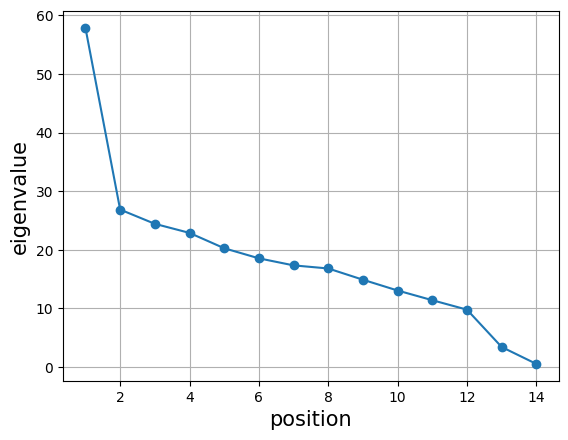

<Figure size 640x480 with 0 Axes>

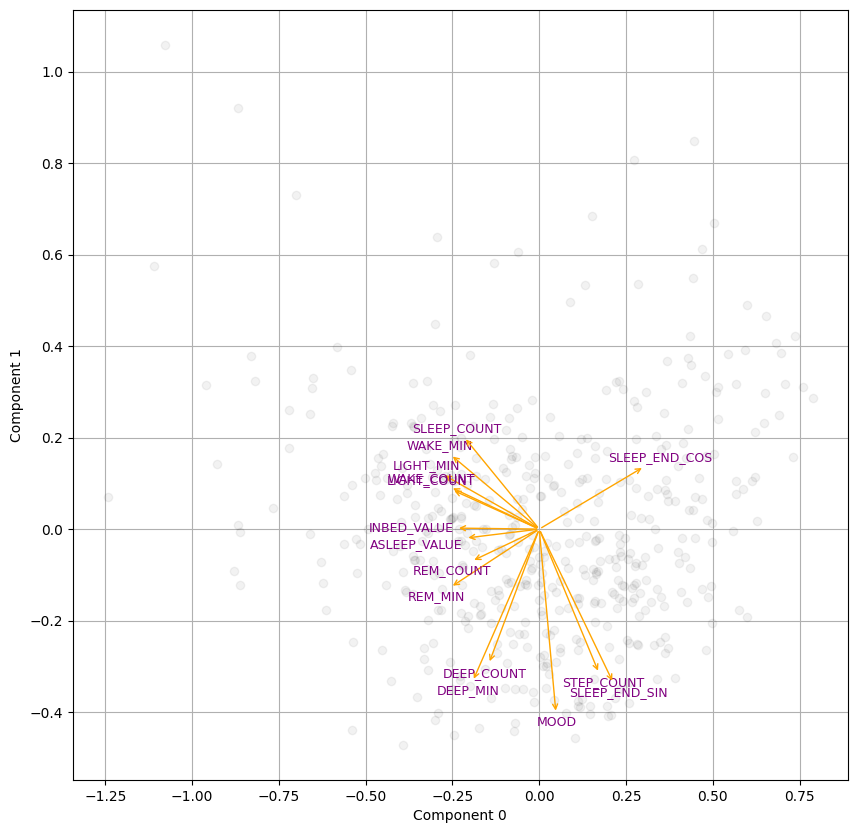

<Figure size 640x480 with 0 Axes>

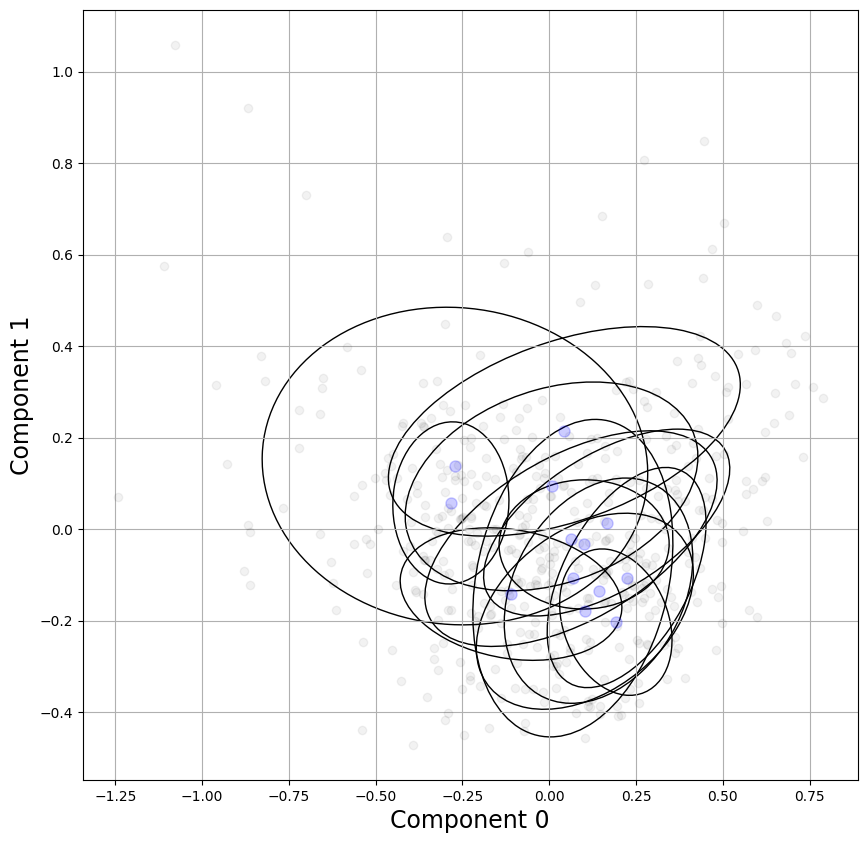

this is variable ky -3.030539313242957
this is variable ky -2.4799510229616444
this is variable ky -1.9293627326803318
this is variable ky -1.3787744423990191
this is variable ky -0.8281861521177065
this is variable ky -0.27759786183639396
this is variable ky 0.2729904284449186
this is variable ky 0.8235787187262312
this is variable ky 1.3741670090075437
this is variable ky 1.9247552992888564


<Figure size 640x480 with 0 Axes>

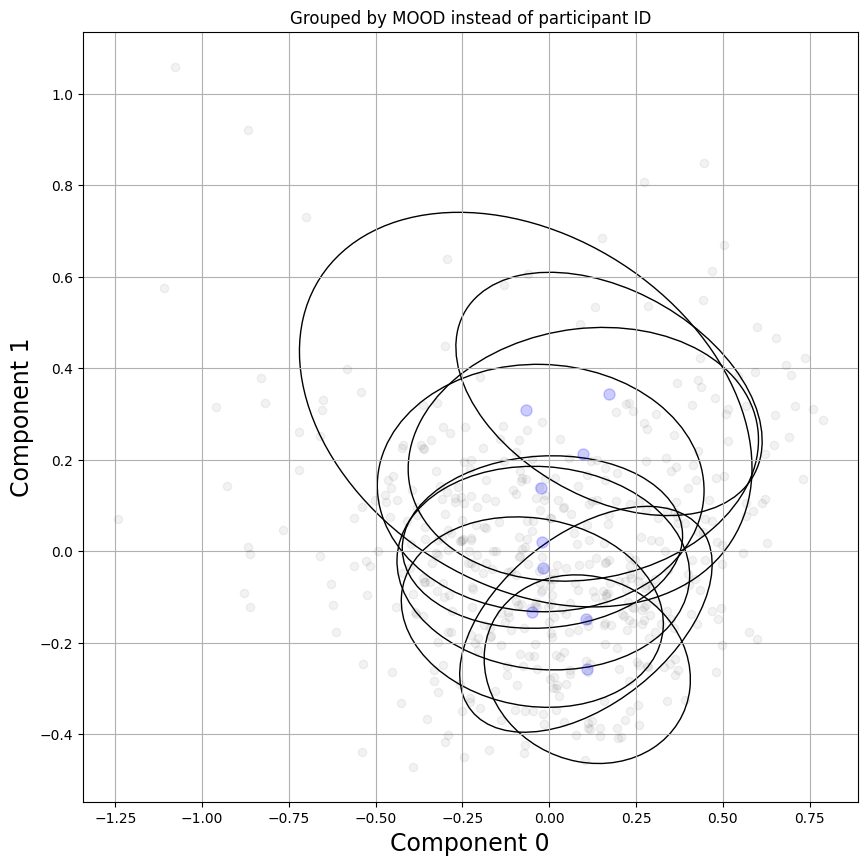

<Figure size 640x480 with 0 Axes>

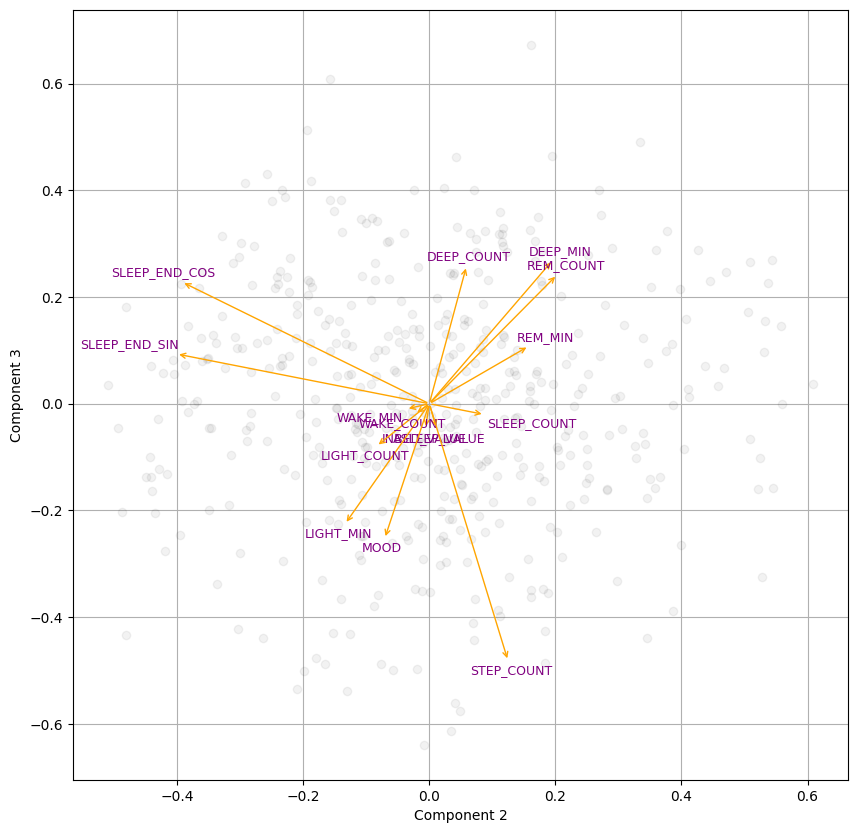

<Figure size 640x480 with 0 Axes>

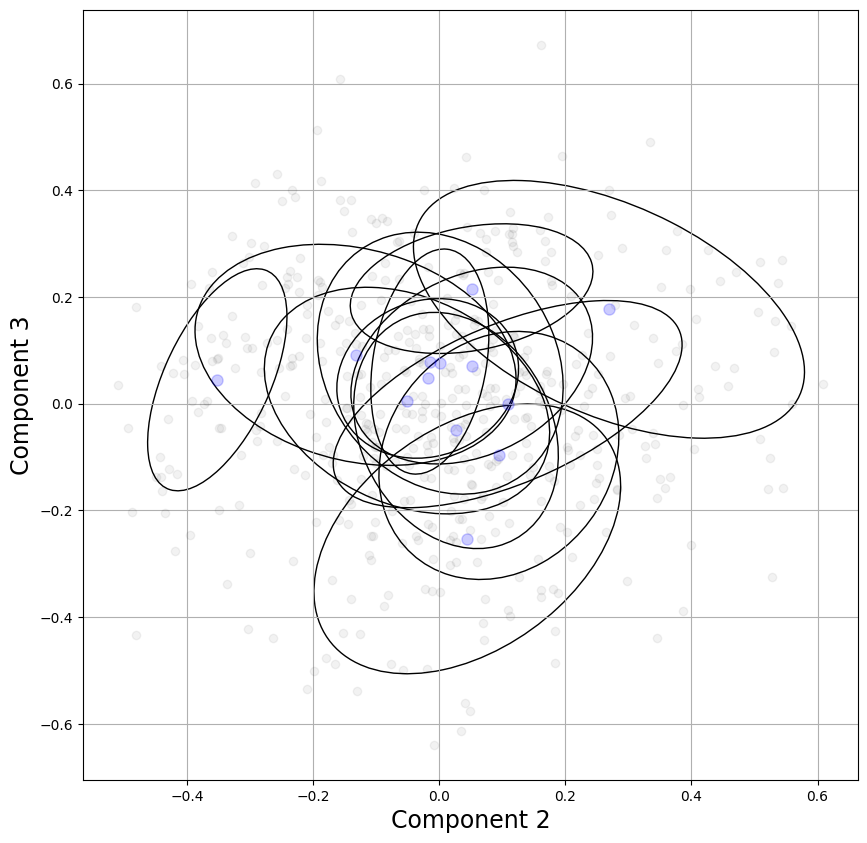

this is variable ky -3.030539313242957
this is variable ky -2.4799510229616444
this is variable ky -1.9293627326803318
this is variable ky -1.3787744423990191
this is variable ky -0.8281861521177065
this is variable ky -0.27759786183639396
this is variable ky 0.2729904284449186
this is variable ky 0.8235787187262312
this is variable ky 1.3741670090075437
this is variable ky 1.9247552992888564


<Figure size 640x480 with 0 Axes>

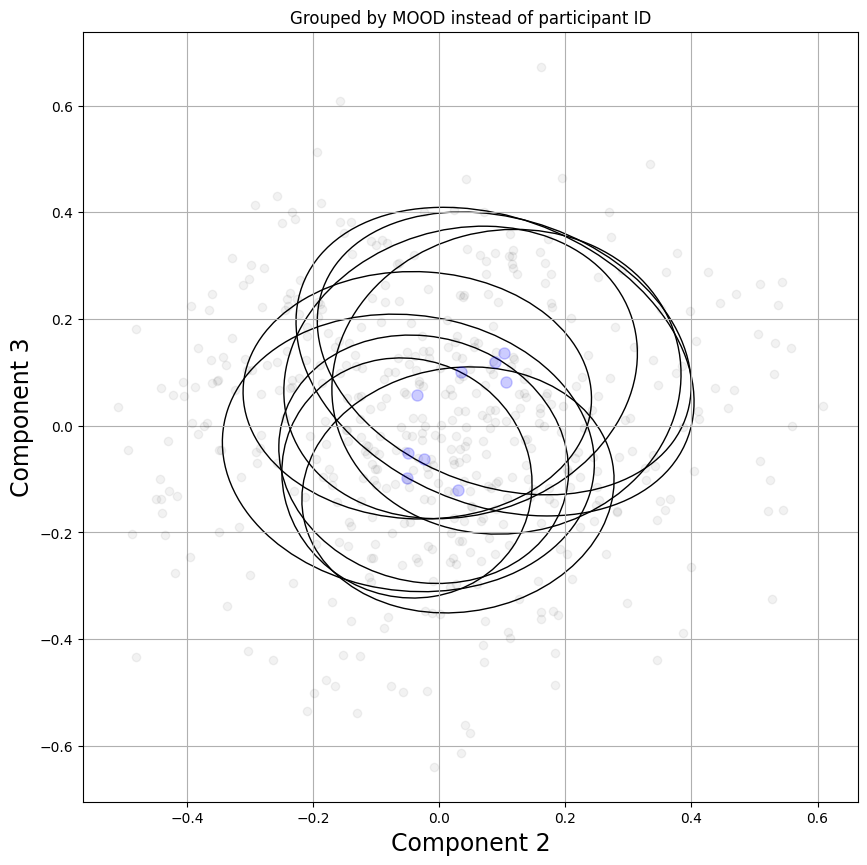

<Figure size 640x480 with 0 Axes>

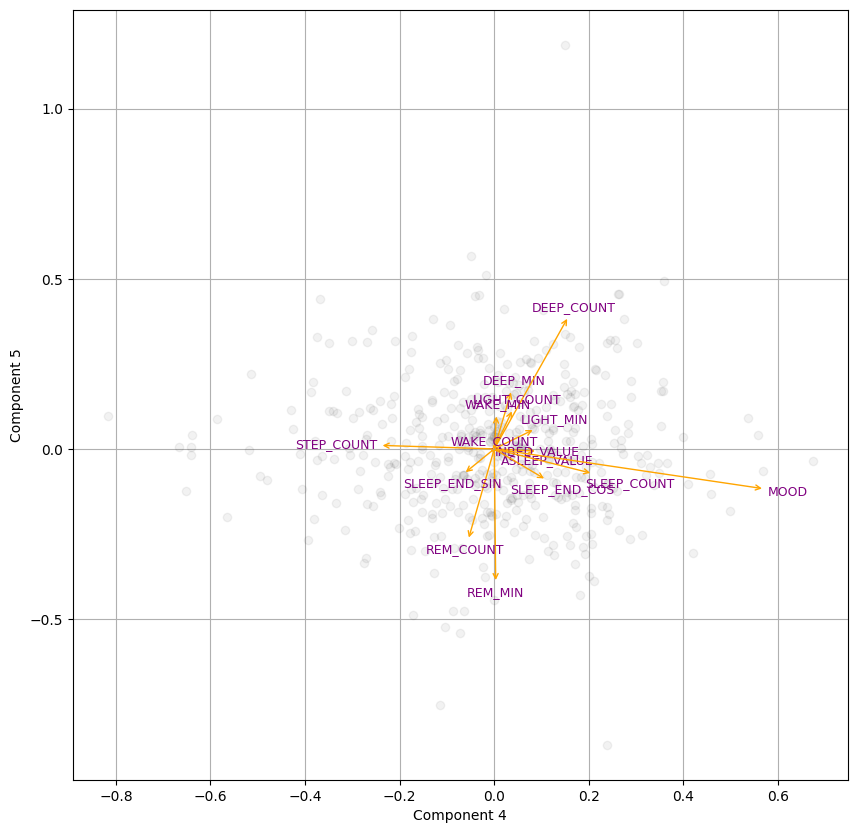

<Figure size 640x480 with 0 Axes>

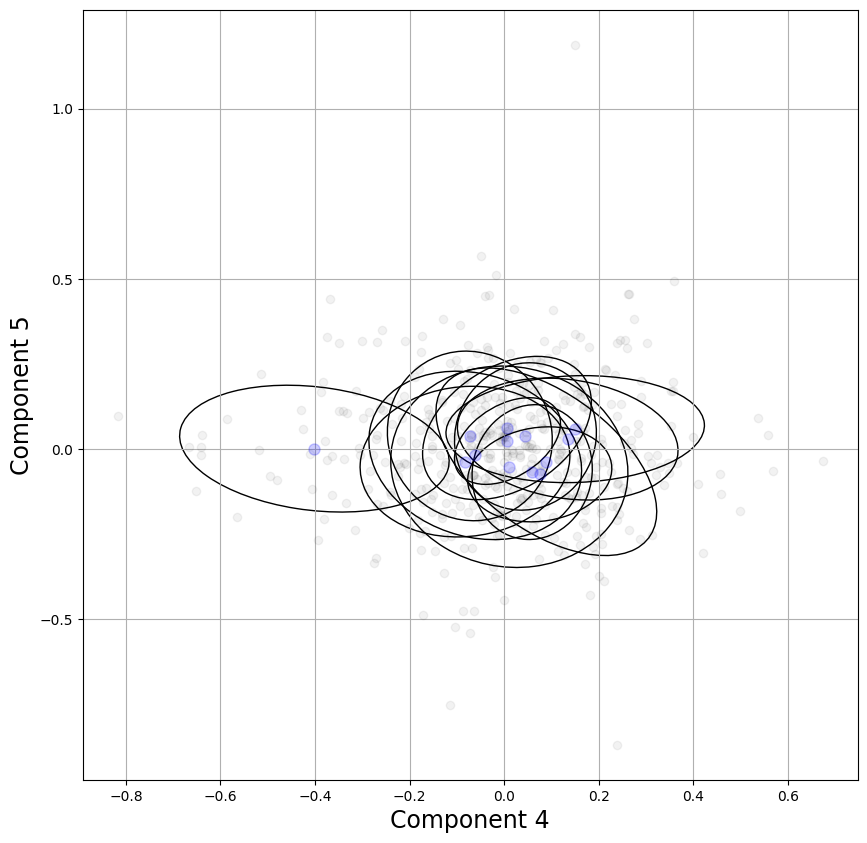

this is variable ky -3.030539313242957
this is variable ky -2.4799510229616444
this is variable ky -1.9293627326803318
this is variable ky -1.3787744423990191
this is variable ky -0.8281861521177065
this is variable ky -0.27759786183639396
this is variable ky 0.2729904284449186
this is variable ky 0.8235787187262312
this is variable ky 1.3741670090075437
this is variable ky 1.9247552992888564


<Figure size 640x480 with 0 Axes>

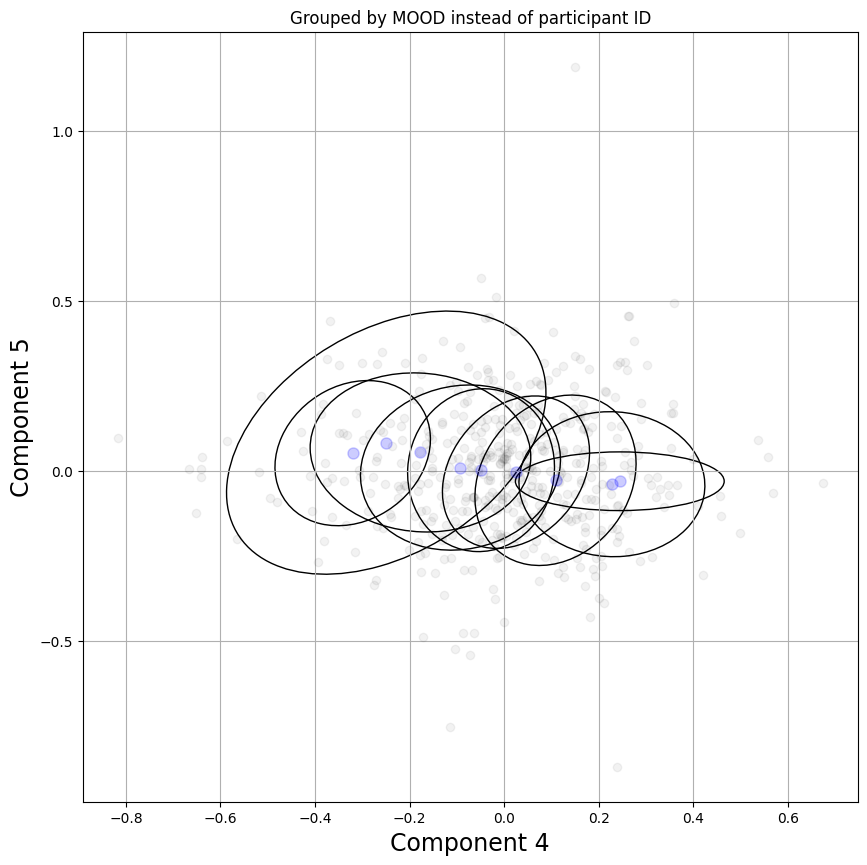

<Figure size 640x480 with 0 Axes>

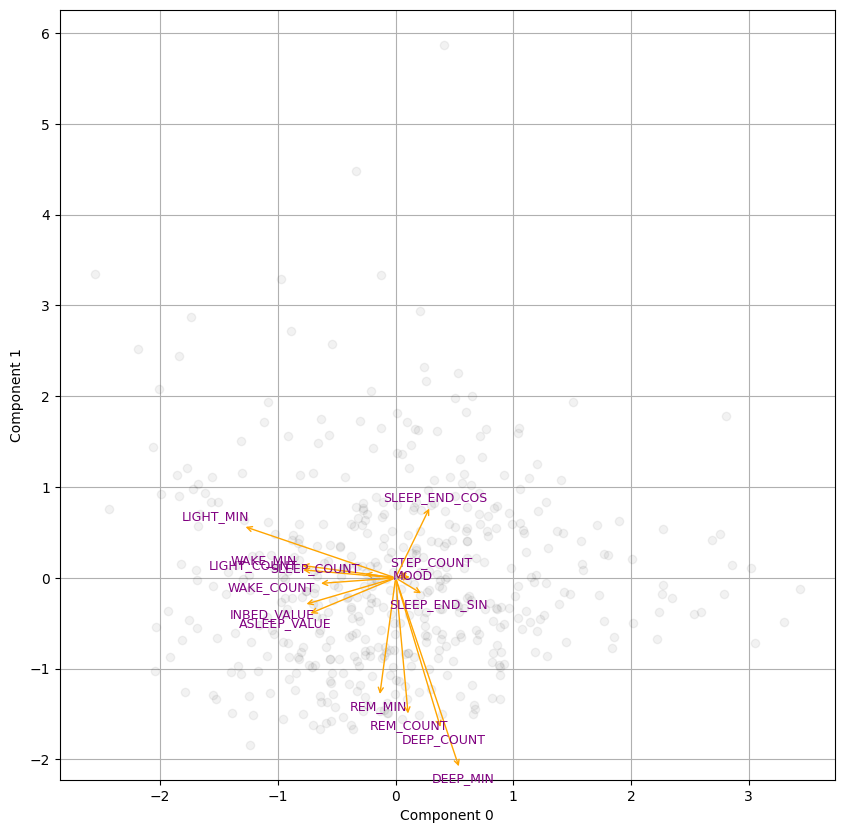

<Figure size 640x480 with 0 Axes>

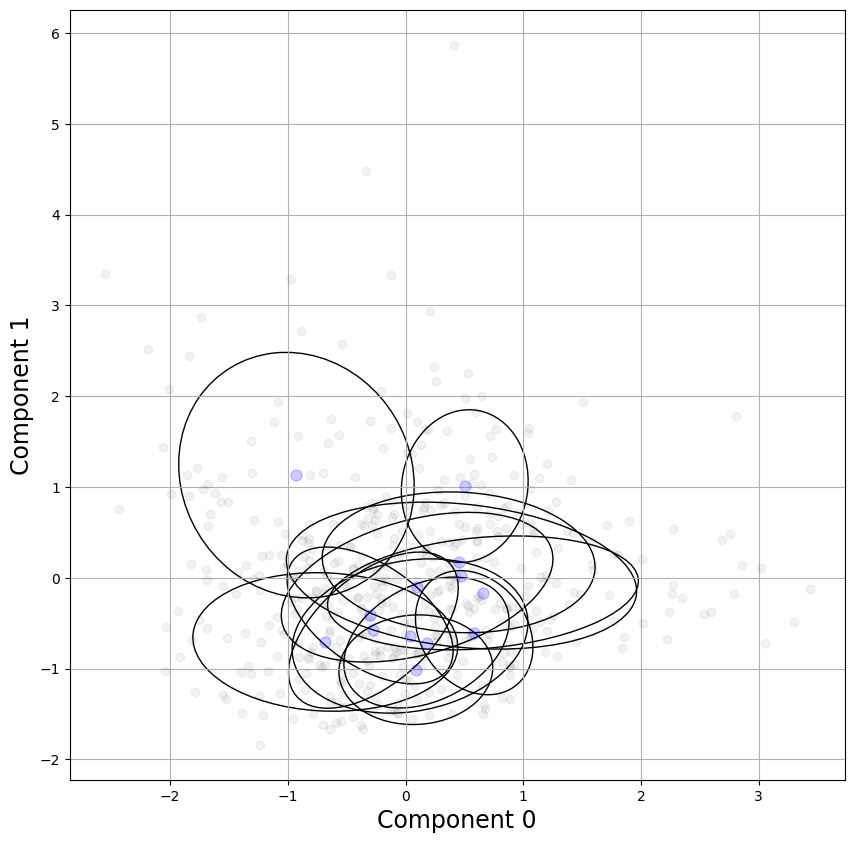

this is variable ky -3.030539313242957
this is variable ky -2.4799510229616444
this is variable ky -1.9293627326803318
this is variable ky -1.3787744423990191
this is variable ky -0.8281861521177065
this is variable ky -0.27759786183639396
this is variable ky 0.2729904284449186
this is variable ky 0.8235787187262312
this is variable ky 1.3741670090075437
this is variable ky 1.9247552992888564


<Figure size 640x480 with 0 Axes>

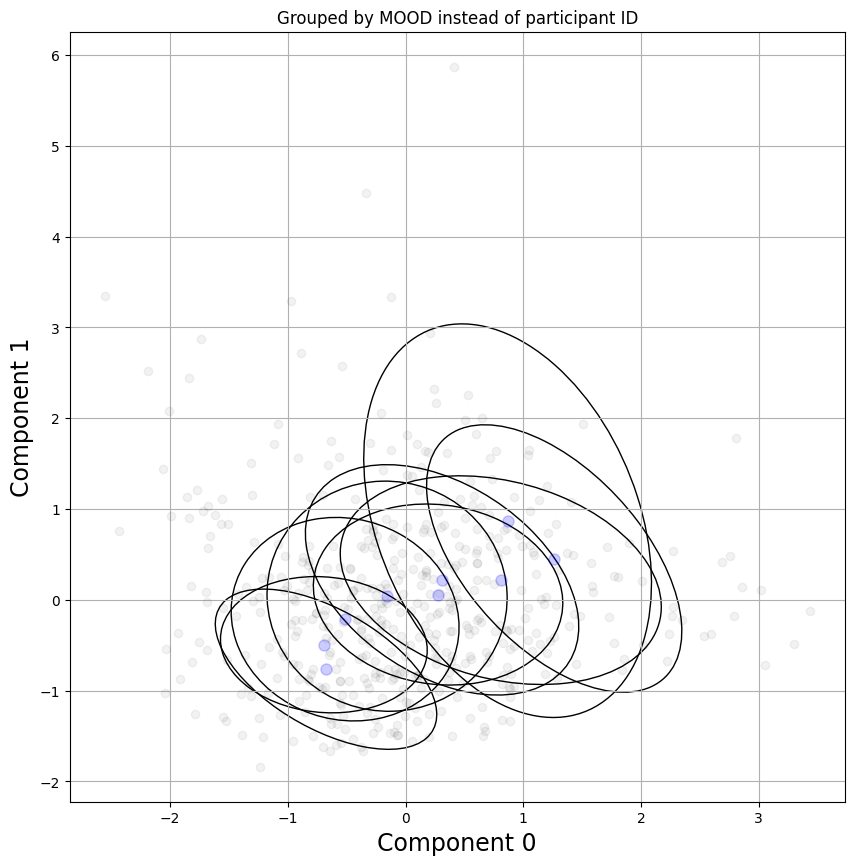

<Figure size 640x480 with 0 Axes>

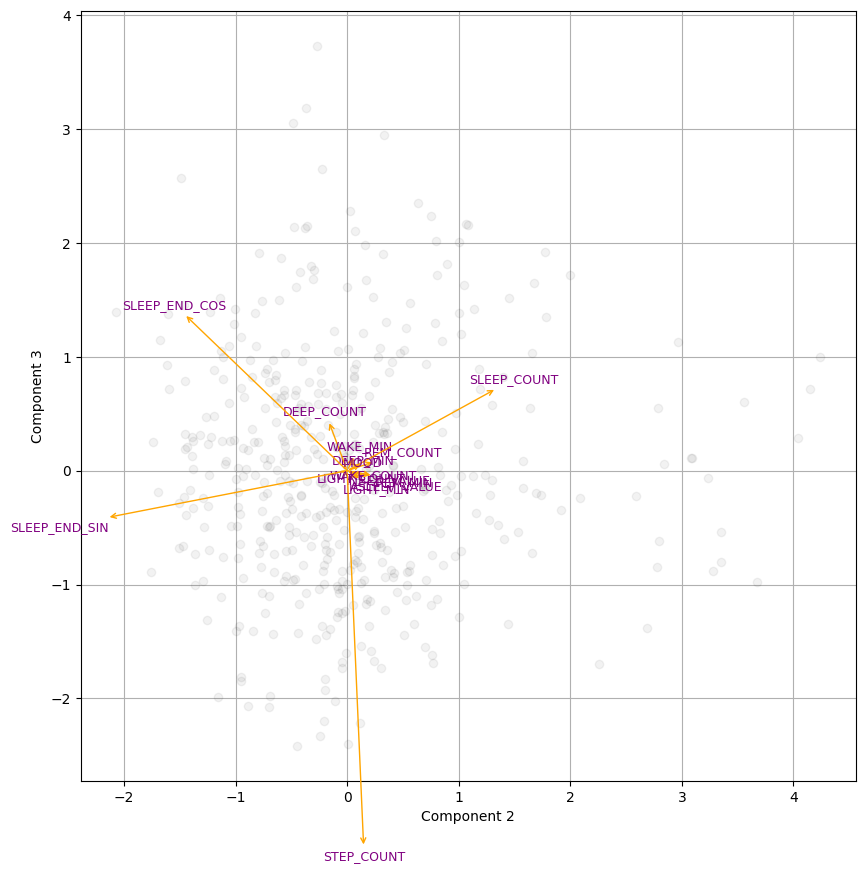

<Figure size 640x480 with 0 Axes>

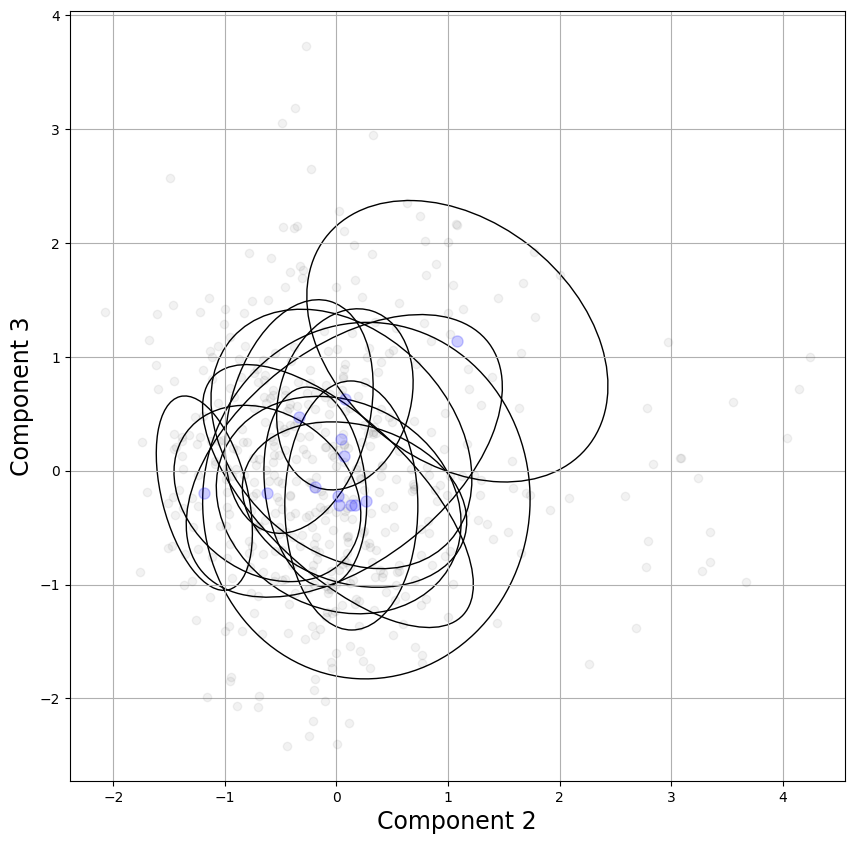

this is variable ky -3.030539313242957
this is variable ky -2.4799510229616444
this is variable ky -1.9293627326803318
this is variable ky -1.3787744423990191
this is variable ky -0.8281861521177065
this is variable ky -0.27759786183639396
this is variable ky 0.2729904284449186
this is variable ky 0.8235787187262312
this is variable ky 1.3741670090075437
this is variable ky 1.9247552992888564


<Figure size 640x480 with 0 Axes>

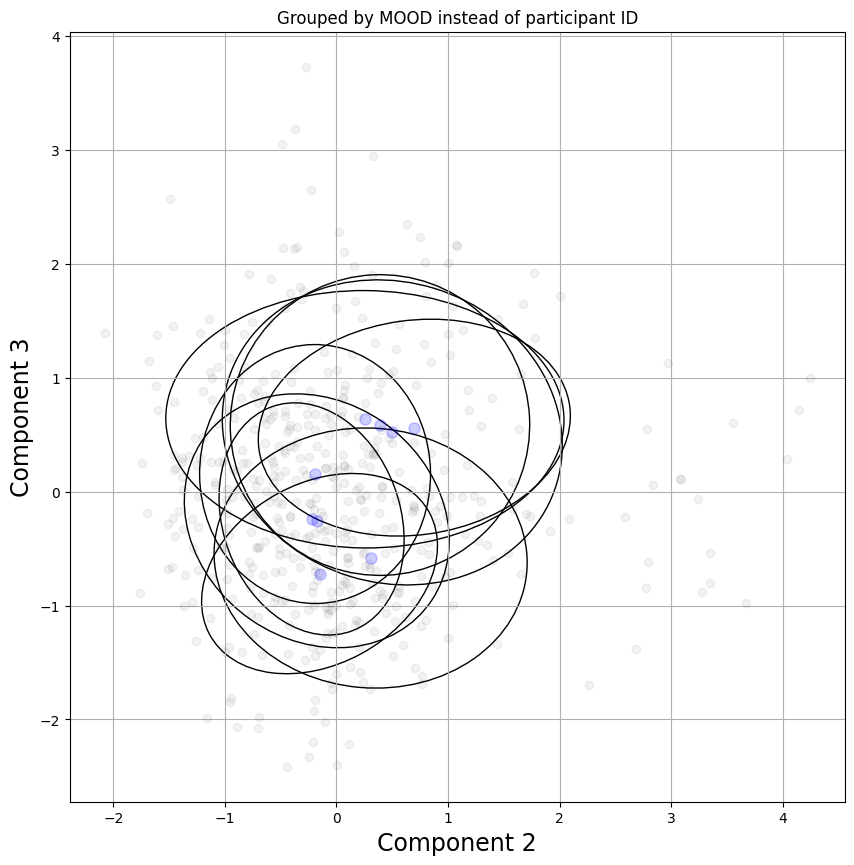

In [495]:
def biplot(dx, va, j=0, k=1, d=5, rotate=False, scree=False, ellipses=False):
    assert d > max(j, k)
    dx = dx.copy()
    X = np.asarray(dx[va])
    n, p = X.shape
    X -= X.mean()
    X -= X.mean(0)
    u, s, vt = np.linalg.svd(X, 0)
    v = vt.T
    if scree:
        plot_eigs(s)
    uu = u[:, 0:d]
    vv = v[:, 0:d]
    ss = s[0:d]
    if rotate:
        uu, Ru = varimax(uu)
        uu *= np.sqrt(n)
        vv, Rv = varimax(vv)
        vv *= np.sqrt(p)
        B = np.dot(Ru.T * ss, Rv) / np.sqrt(n*p)
    else:
        uu *= (ss**0.5)
        vv *= (ss**0.5)
        B = np.eye(d)
        
    ff = np.sqrt(X.shape[0] / X.shape[1]) # May need to adjust this
    v /= ff
    plt.clf()
    plt.figure(figsize=(10, 10))
    plt.grid(True)
    plt.plot(uu[:, j], uu[:, k], "o", color="black", alpha=0.05)
    for i in range(v.shape[0]):
        plt.annotate(va[i], xy=(0, 0), xytext=(vv[i, j], vv[i, k]), 
                     arrowprops=dict(color='orange', arrowstyle="<-"), color="purple", size=9)
    plt.xlabel("Component %d" % j)
    plt.ylabel("Component %d" % k)
    plt.show()
    
    if ellipses:
        ellipse_plot(uu[:, [j, k]], dx["STUDY_PRTCPT_ID"], j,k)
    
    ellipse_plot_MOOD_categories(uu[:, [j, k]], dx["MOOD"], j,k) 
        
biplot(df_MOOD_sleep_polar_MOOD_NZ_norm, va, 0, 1, d=5, rotate=False, scree=True, ellipses=True)
biplot(df_MOOD_sleep_polar_MOOD_NZ_norm, va, 2, 3, d=5, rotate=False, ellipses=True)
biplot(df_MOOD_sleep_polar_MOOD_NZ_norm, va, 4, 5, d=6, rotate=False, ellipses=True)
biplot(df_MOOD_sleep_polar_MOOD_NZ_norm, va, 0, 1, d=5, rotate=True, ellipses=True)
biplot(df_MOOD_sleep_polar_MOOD_NZ_norm, va, 2, 3, d=5, rotate=True, ellipses=True)

In [496]:
# Plotting clusters of MOOD


# MANOVA

Use multivariate analysis of variance (MANOVA) to understand the between-subject and within-subject differences.

In [497]:
def manova1(dx, va, grp):
    """
    Run MANOVA on the data in dx[va], which have been centered.  The groups are
    defined by the column dx[grp].
    
    Returns:
    - H : Scaled estimate of Cov E[X|g]
    - E : Scaled estimate of E Cov[X|g]
    - ee : eigenvalues of E^-1 H
    - B : eigenvectors of E^-1 H
    - (pillai, trace, lawley, roy) : fit statistics
    """
    dg = dx.groupby(grp)[va]
    X = dx[va].values
    w = dg.size()
    M = dg.mean()
    assert all(w.index == M.index)
    w = w.values
    M = M.values
    Mw = np.sqrt(w)[:, None] * M
    H = np.dot(Mw.T, Mw)
    E = np.dot(X.T, X) - H
    ee, B = eigh(H, E)
    if ee.min() < 0:
        raise ValueError("Negative eigenvalue in MANOVA")
    ii = np.argsort(-ee)
    ee = ee[ii]
    B = B[:, ii]
    pillai = np.sum(ee / (1 + ee))
    lawley = np.sum(ee)
    wilks = np.prod(1 / (1 + ee))
    roy = ee[0] / (1 + ee[0])
    return H, E, ee, B, (pillai, lawley, wilks, roy)

In [498]:
def manova(dx, va, grp, nrep=1000, center=True):
    """
    Run MANOVA on the data in X, using randomization to calibrate the statistics.
    
    Returns:
    - H : Scaled estimate of Cov E[X|g]
    - E : Scaled estimate of E Cov[X|g]
    - ee : eigenvalues of E^-1 H
    - B : eigenvectors of E^-1 H
    - (pillai, trace, lawley, roy) : fit statistics
    - stats0 : each row is a randomized realization of the fit statistics
    """
    dx = dx.copy()
    if center:
        dx[va] = dx[va] - dx[va].mean(0)
    X = dx[va].values
    a, _ = np.linalg.eigh(np.cov(X.T))
    if a.min() <= 1e-8:
        raise ValueError("The marginal covariance matrix is singular")
    n = dx.shape[0]
    H, E, ee, B, stats = manova1(dx, va, grp)
    stats0 = np.empty((nrep, 4))
    for i in range(nrep):
        dx[grp] = dx[grp].sample(frac=1).values
        _, _, _, _, s = manova1(dx, va, grp)
        stats0[i, :] = s
        
    return X, H, E, ee, B, stats, stats0

Transform the MANOVA summary statistics to make them more interpretable.

In [499]:
def xstat_manova(stats, stats0, p):
    stats = np.copy(stats)
    stats0 = np.copy(stats0)
    # Pillai becomes the mean PVE
    stats[0] /= p
    stats0[:, 0] /= p
    # Lawley becomes the mean SNR
    stats[1] /= p
    stats0[:, 1] /= p
    # Wilks becomes the geometric mean of 1 - PVE
    stats[2] = np.power(stats[2], 1/p)
    stats0[:, 2] = np.power(stats0[:, 2], 1/p)
    # Not sure what to do with this...
    stats[3] = np.power(stats[3], 1/p)
    stats0[:, 3] = np.power(stats0[:, 3], 1/p)
    return stats, stats0

Run the MANOVA to assess inter-subject differences.  ASLEEP_VALUE is redundant so drop it here.

In [500]:
va1 = [x for x in va if x not in ["ASLEEP_VALUE", "SLEEP_END_SIN", "SLEEP_END_COS"]]
dx = df_MOOD_sleep_polar_MOOD_NZ_norm
X0, H, E, ee, B, stats, stats0 = manova(dx, va1, "STUDY_PRTCPT_ID")
statsx, stats0x = xstat_manova(stats, stats0, len(va))

In [501]:
print("X0 is %s" %X0)
np.shape(X0)

X0 is [[ 0.84459367 -0.07929533  0.95444575 ... -0.14821183  0.3143348
   0.27299043]
 [ 1.60365375 -0.37512492  1.61852881 ... -0.05562769  1.21431174
   0.82357872]
 [ 1.66318788  0.06861947  0.95444575 ... -0.13087873  0.98490585
   0.27299043]
 ...
 [ 0.86691897 -0.48606102 -1.03780345 ... -1.28987148  0.27904158
  -1.37877444]
 [ 3.5757216   1.28891654  1.61852881 ... -1.31777354  2.54663054
  -1.92936273]
 [-1.35072714 -0.85584801  0.29036268 ... -1.04128941 -1.74149488
  -2.47995102]]


(478, 12)

Plot the summary statistics.

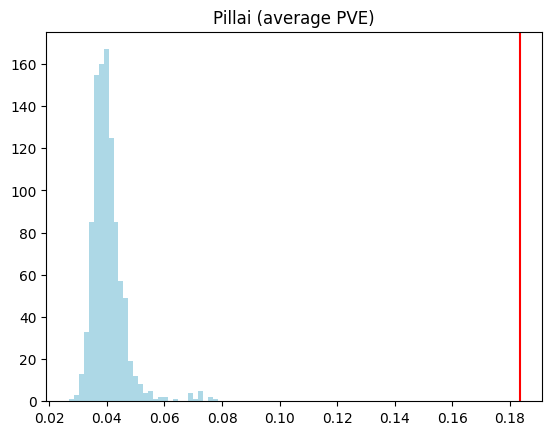

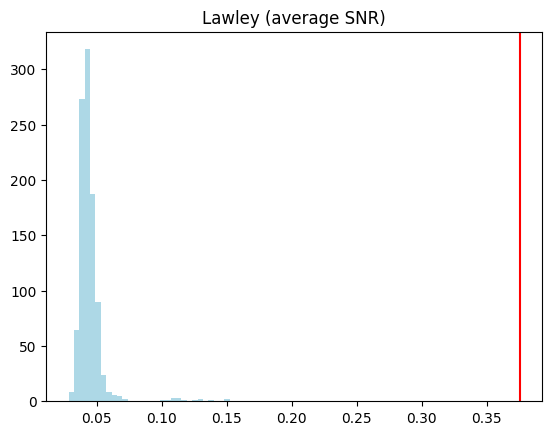

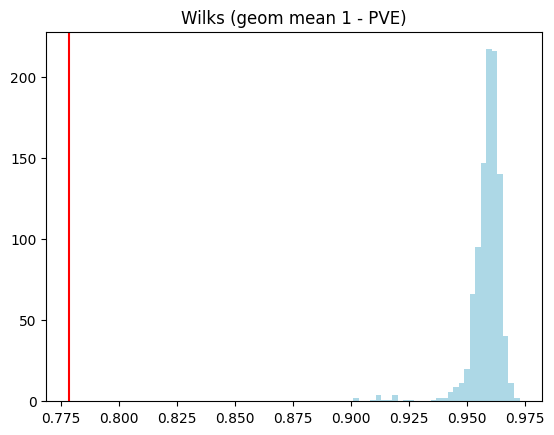

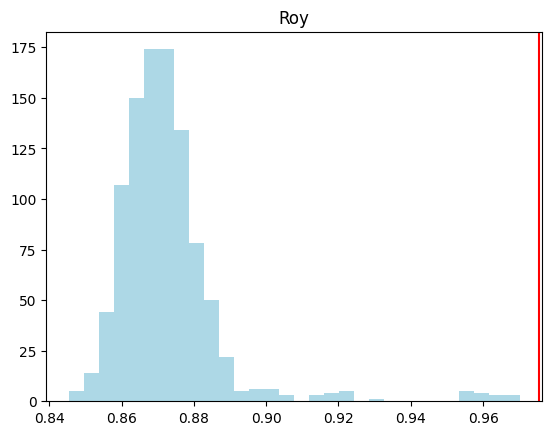

In [502]:
for (k, ti) in enumerate(["Pillai (average PVE)", "Lawley (average SNR)", "Wilks (geom mean 1 - PVE)", "Roy"]):
    plt.hist(stats0x[:, k], bins=30, color="lightblue")
    plt.axvline(statsx[k], color="red")
    plt.title(ti)
    plt.show()

Generate biplots to show how the MANOVA factors relate to the observed variables

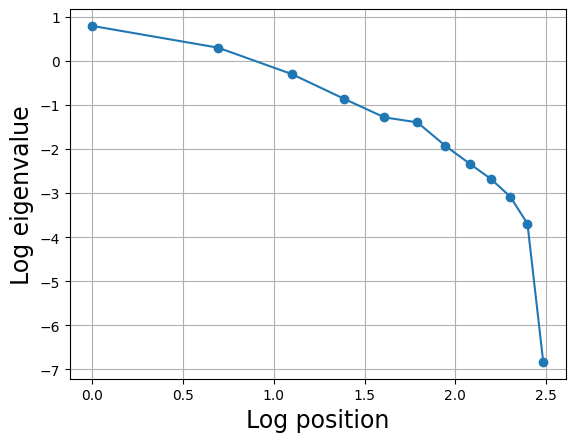

<Figure size 640x480 with 0 Axes>

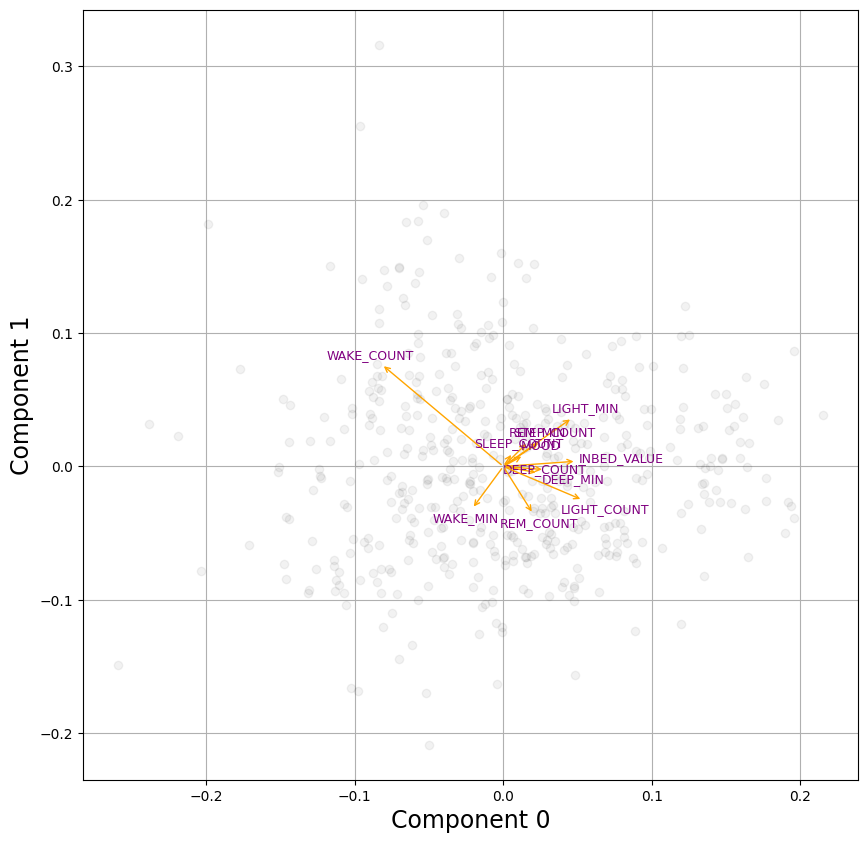

<Figure size 640x480 with 0 Axes>

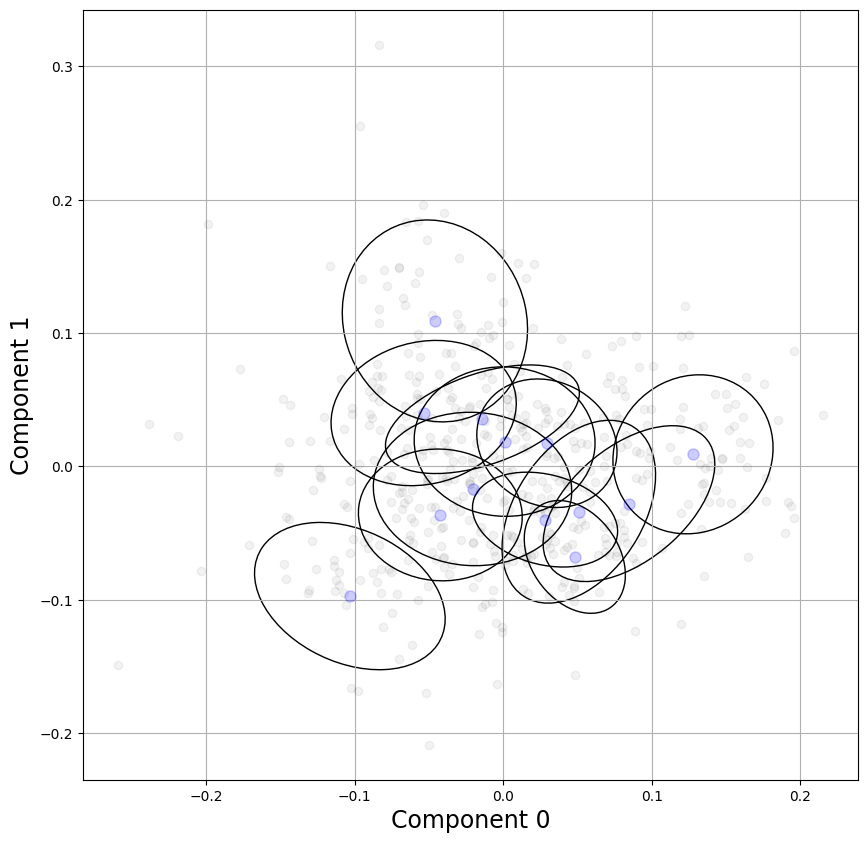

<Figure size 640x480 with 0 Axes>

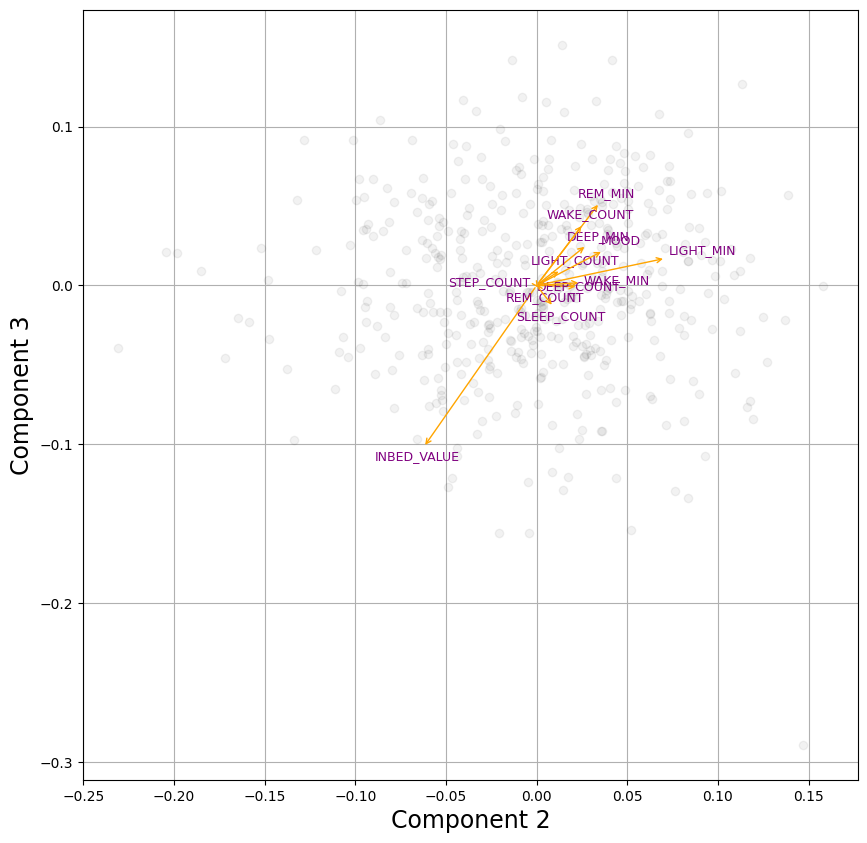

<Figure size 640x480 with 0 Axes>

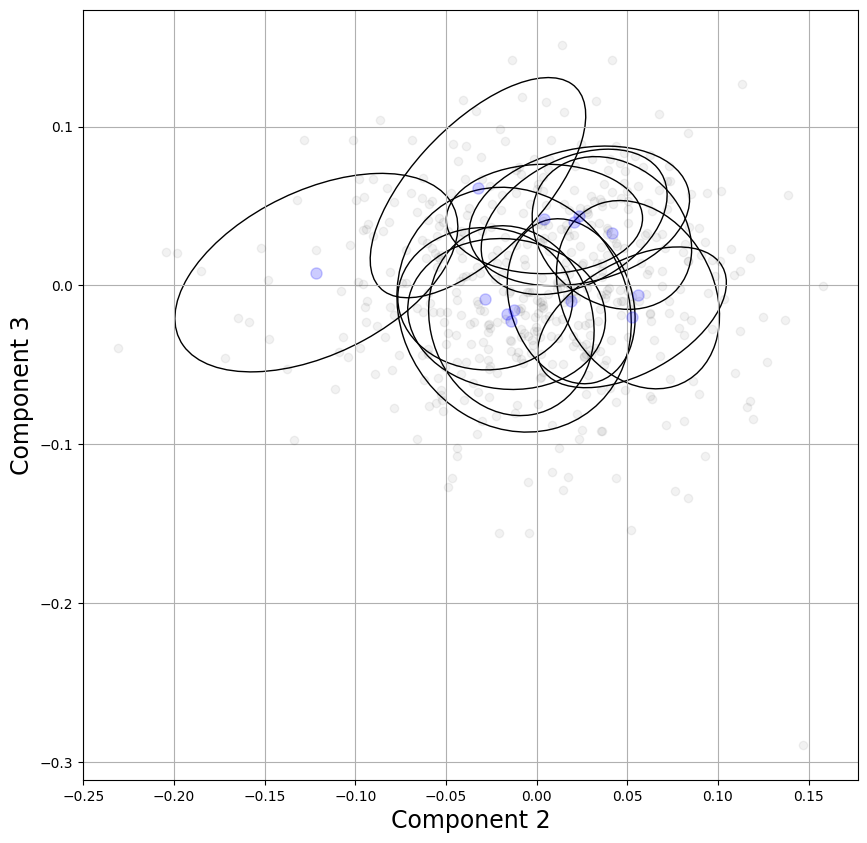

<Figure size 640x480 with 0 Axes>

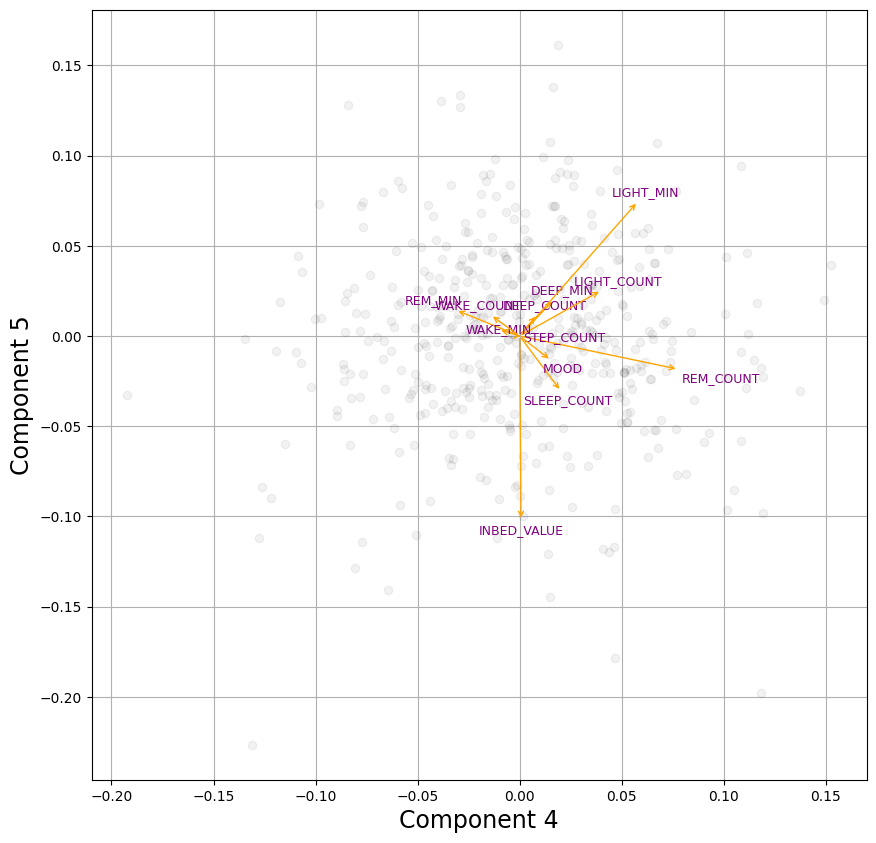

<Figure size 640x480 with 0 Axes>

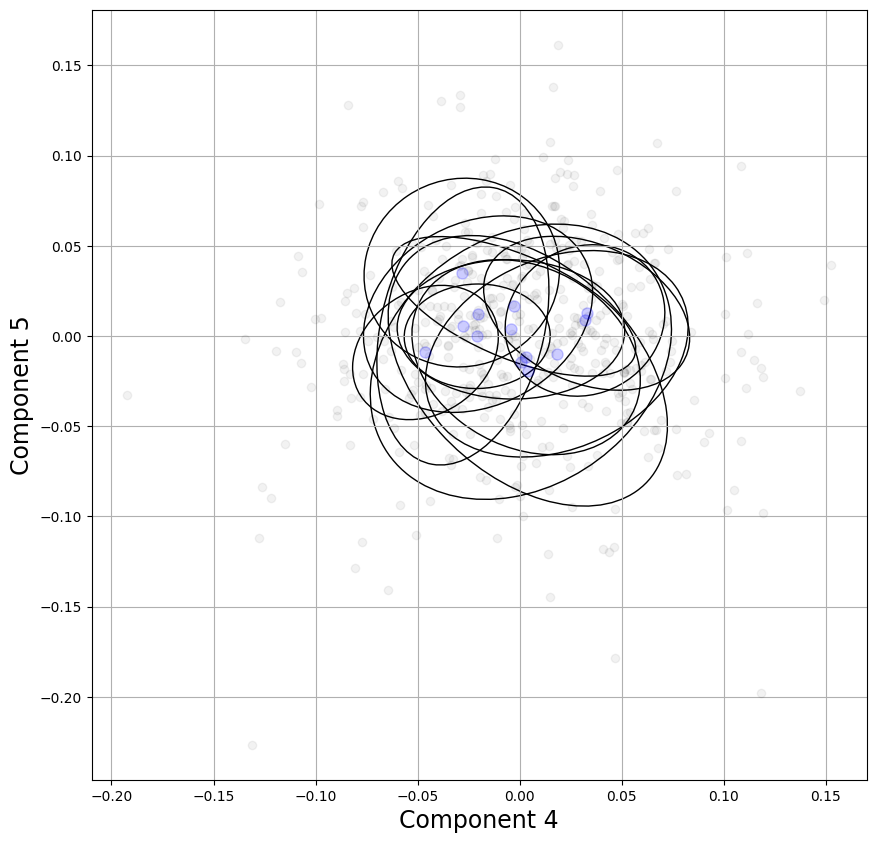

In [503]:
def biplot(j0, j1, X0, B, ee, va, scree=False, ellipses=True):
    scores = np.dot(X0, B[:, [j0, j1]])
    if scree:
        plt.clf()
        plt.grid(True)
        jj = np.arange(1, len(ee)+1)
        plt.plot(np.log(jj), np.log(ee), "-o")
        plt.xlabel("Log position", size=17)
        plt.ylabel("Log eigenvalue", size=17)
        plt.show()
    plt.clf()
    plt.figure(figsize=(10,10))
    plt.grid(True)
    plt.plot(scores[:, 0], scores[:, 1], "o", color="black", alpha=0.05)
    for i in range(B.shape[0]):
        plt.annotate(va[i], xy=(0, 0), xytext=(B[i, j0], B[i, j1]), 
                     arrowprops=dict(color='orange', arrowstyle="<-"), color="purple", size=9)
    plt.xlabel("Component %d" % j0, size=17)
    plt.ylabel("Component %d" % j1, size=17)
    plt.show()

    if ellipses:
        ellipse_plot(scores, dx["STUDY_PRTCPT_ID"], j0, j1)
 
biplot(0, 1, X0, B, ee, va1, scree=True, ellipses=True)
biplot(2, 3, X0, B, ee, va1, ellipses=True)
biplot(4, 5, X0, B, ee, va1, ellipses=True)

Dimension reduction regression
Use sliced inverse regression to understand the possible roles of day of week, and seasonality

In [504]:
def sir(dx, xv, yv):
    dx = dx.copy()
    dx[xv] = dx[xv] - dx[xv].mean(0)
    C = dx[xv].cov()
    a,_ = eigh(C)
    if a.min() < 1e-10:
        raise ValueError("Marginal covariance of predictors is singular")
    mn, wt = [], []
    for (ky,dg) in dx.groupby(yv):
        mn.append(dg[xv].mean(0))
        wt.append(dg.shape[0])
    M = np.stack(mn)
    wt = np.asarray(wt)
    wt = wt / wt.sum()
    Mw = np.sqrt(wt)[:, None] * M
    H = np.dot(Mw.T, Mw)    
    a, b = eigh(H, C)
    ii = np.argsort(-a)
    a = a[ii]
    b = b[:, ii]
    b = pd.DataFrame(b, columns=["B%d" % j for j in range(len(xv))], index=xv)
    return b, a

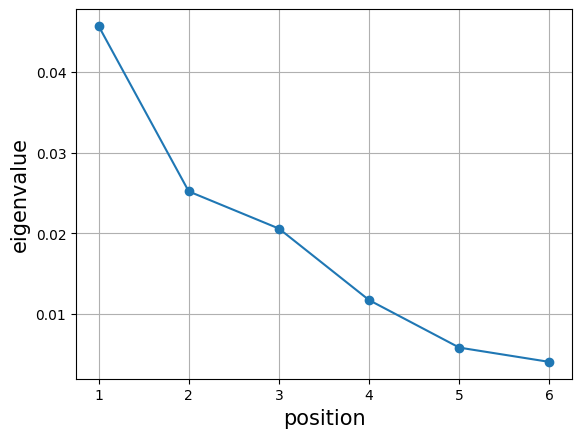

B0        B1        B2        B3
DEEP_MIN    -0.708073 -0.313208  0.136842  0.032431
DEEP_COUNT  -0.038389 -0.254756 -0.442084 -0.101614
LIGHT_MIN   -0.255960 -1.055415  0.423239 -0.720682
LIGHT_COUNT  0.206722 -0.062135  0.947632  0.988835
REM_MIN     -0.345387  0.672760 -0.136511  0.665891
REM_COUNT   -0.335456 -0.225441  0.048785 -0.749468
WAKE_MIN     0.060698 -0.041299 -0.003905  0.718007
WAKE_COUNT   0.255472  0.974368 -1.134075 -0.815983
STEP_COUNT   0.071963 -0.025935  0.220163 -0.490100
SLEEP_COUNT  0.158411  0.113912  0.710314  0.053613
MOOD         0.171279 -0.394526 -0.395836  0.355940

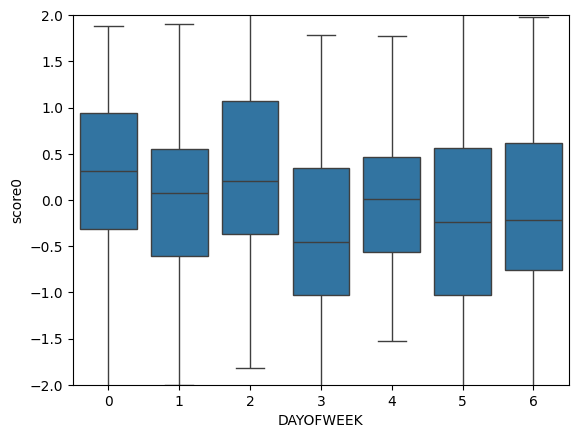

In [505]:
va2 = [x for x in va1 if x != "INBED_VALUE"]

dirs, eigs = sir(df_MOOD_sleep_polar_MOOD_NZ_norm, va2, "DAYOFWEEK")
plot_eigs(eigs)

dirs.iloc[:, 0:4]
scores = np.dot(dx[va2], dirs.iloc[:, 0:3])

dp = pd.DataFrame({"DAYOFWEEK": dx["DAYOFWEEK"], "score0": scores[:, 0]})
sns.boxplot(dp, x="DAYOFWEEK", y="score0")
plt.ylim(-2, 2)
dirs.iloc[:, 0:4]

C:\Users\rajnishk\AppData\Local\Temp\ipykernel_9656\3073359268.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (ky,dg) in dx.groupby(yv):


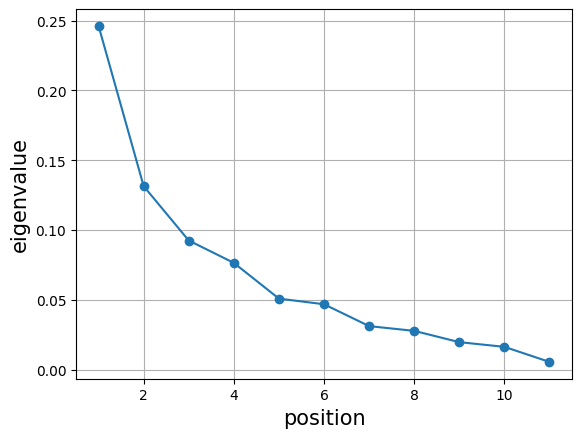

B0        B1        B2        B3
DEEP_MIN    -0.245411 -0.303552  0.285499 -0.009119
DEEP_COUNT   0.320855  0.123002 -0.126851  0.633141
LIGHT_MIN    0.695670 -0.253824  0.423814 -0.335370
LIGHT_COUNT -0.880957 -0.975477 -0.569069  0.532698
REM_MIN      0.630792  0.702642  0.543984  0.433767
REM_COUNT   -1.112956 -0.459761 -0.602992  0.086365
WAKE_MIN    -0.380151  0.656084 -0.785484 -0.516982
WAKE_COUNT   1.448116  0.995433  0.542602 -0.227566
STEP_COUNT   0.150765 -0.293238 -0.702890  0.315082
SLEEP_COUNT -0.094488  0.083127 -0.345882 -0.168974
MOOD         0.155353 -0.419991 -0.191209 -0.500832

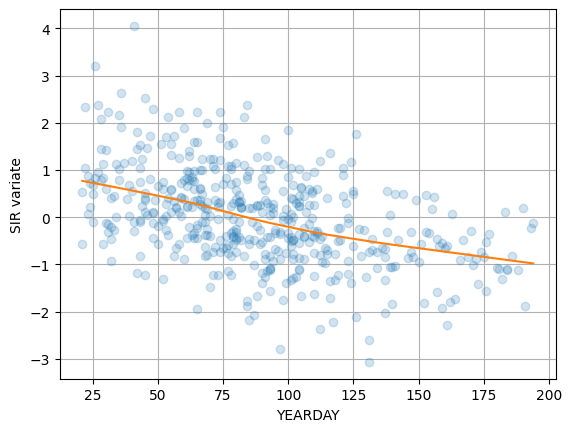

In [506]:
dx["YEARDAYu"] = pd.qcut(dx["YEARDAY"], 20)

dirs, eigs = sir(df_MOOD_sleep_polar_MOOD_NZ_norm, va2, "YEARDAYu")
plot_eigs(eigs)

scores = np.dot(dx[va2], dirs.iloc[:, 0:3])

xy = lowess(scores[:, 0], dx["YEARDAY"])

plt.clf()
plt.grid(True)
plt.plot(dx["YEARDAY"], scores[:, 0], "o", alpha=0.2)
plt.plot(xy[:, 0], xy[:, 1], "-")
plt.ylabel("SIR variate")
plt.xlabel("YEARDAY")
dirs.iloc[:, 0:4]

# UMAP

This is a very popular modern method but I'm not sure whether it will be useful for us.  It is worth a try.

In [507]:
import umap

um = umap.UMAP(random_state=123)
emb = um.fit_transform(df_MOOD_sleep_polar_MOOD_NZ_norm[va1])
emb -= emb.mean(0)
emb /= emb.std(0)

C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_analysis\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Color the points by person

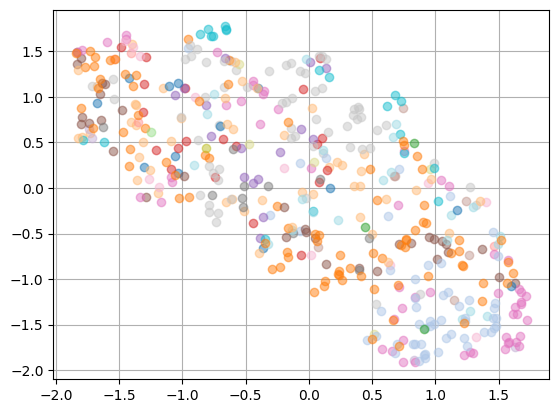

In [508]:
tab20 = matplotlib.colormaps["tab20"].colors
plt.clf()
plt.grid(True)
dp = pd.DataFrame({"id": df_MOOD_sleep_polar_MOOD_NZ_norm["STUDY_PRTCPT_ID"], "emb0": emb[:, 0], "emb1": emb[:, 1]})
for j,(ky,dg) in enumerate(dp.groupby("id")):
    plt.plot(dg["emb0"], dg["emb1"], "o", alpha=0.5, color=tab20[j % 20])

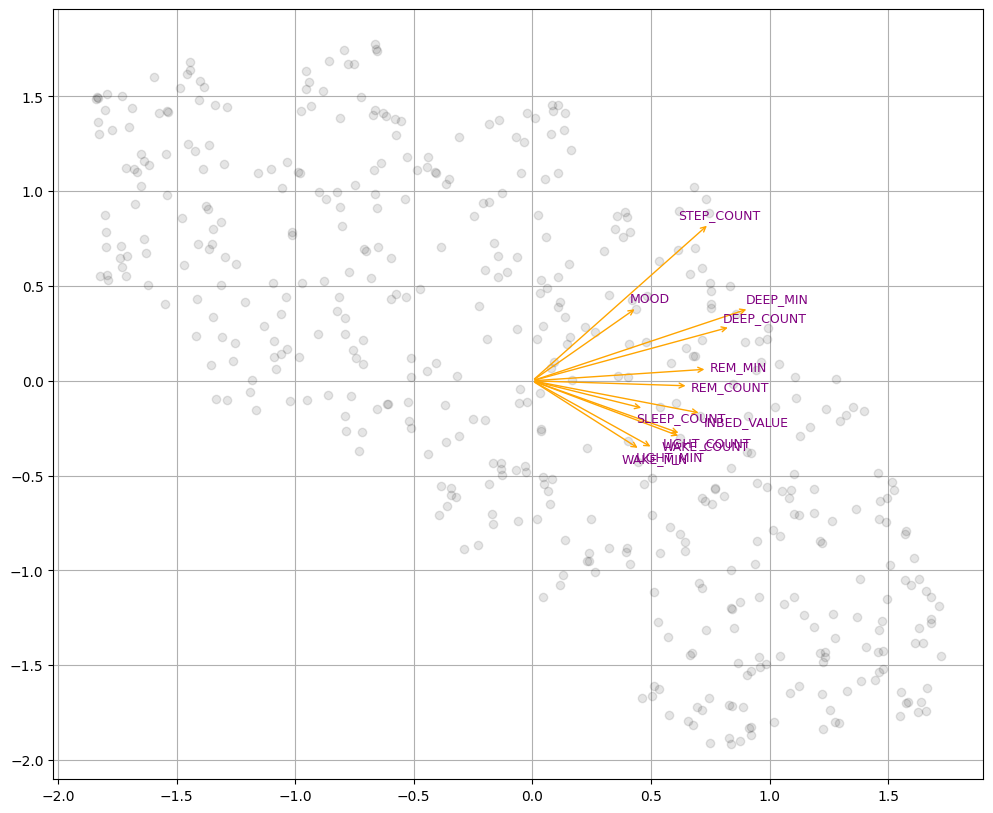

In [509]:
plt.clf
plt.figure(figsize=(12, 10))
plt.grid(True)
plt.plot(emb[:, 0], emb[:, 1], "o", color="black", alpha=0.1)
for v in va1:
    cc = np.linalg.lstsq(emb, df_MOOD_sleep_polar_MOOD_NZ_norm[v], rcond=None)[0]
    plt.annotate(v, xy=(0, 0), xytext=cc, 
                 arrowprops=dict(color='orange', arrowstyle="<-"), color="purple", size=9)
plt.show()

<Figure size 640x480 with 0 Axes>

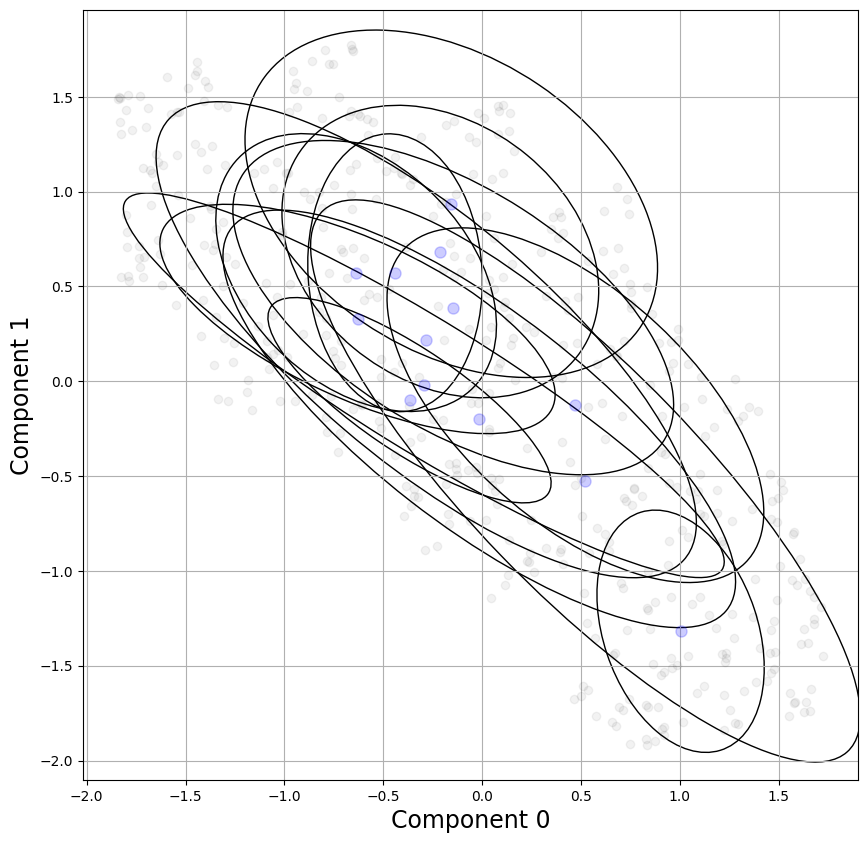

In [510]:
ellipse_plot(emb, df_MOOD_sleep_polar_MOOD_NZ_norm["STUDY_PRTCPT_ID"], 0, 1)

# CORE

Covariance reduction to identify heteroscedasticity.

In [511]:
tab20 = matplotlib.colormaps["tab20"].colors

In [512]:
nobs = df_MOOD_sleep_polar_MOOD_NZ_norm["STUDY_PRTCPT_ID"].value_counts()
nobs = pd.DataFrame({"STUDY_PRTCPT_ID": nobs.index, "nobs": nobs.values})
dy = pd.merge(df_MOOD_sleep_polar_MOOD_NZ_norm, nobs, left_on="STUDY_PRTCPT_ID", right_on="STUDY_PRTCPT_ID")
dy = dy.loc[dy.nobs > 10, :]
idx = np.asarray(dy["STUDY_PRTCPT_ID"].astype(str))
X = np.asarray(dy[va2])
m = CORE(idx, X, 2)
r = m.fit(maxiter=1000)
qq = pd.DataFrame(r.params, va2, columns=["B%d" % j for j in range(2)])
qq

C:\Users\rajnishk\AppData\Local\anaconda3\envs\SWG_analysis\Lib\site-packages\statsmodels\regression\dimred.py:694: ConvergenceWarning: CovReduce optimization did not converge, |g|=417991.963998
  warnings.warn(msg, ConvergenceWarning)


B0        B1
DEEP_MIN    -0.458478 -0.650058
DEEP_COUNT  -0.113559 -0.100421
LIGHT_MIN    0.607562 -0.205493
LIGHT_COUNT -0.047902 -0.041914
REM_MIN      0.347780 -0.035711
REM_COUNT   -0.029199 -0.025653
WAKE_MIN     0.281703  0.249012
WAKE_COUNT  -0.078087 -0.069570
STEP_COUNT  -0.070661 -0.062438
SLEEP_COUNT -0.415003  0.658990
MOOD        -0.144910 -0.128097

<Figure size 640x480 with 0 Axes>

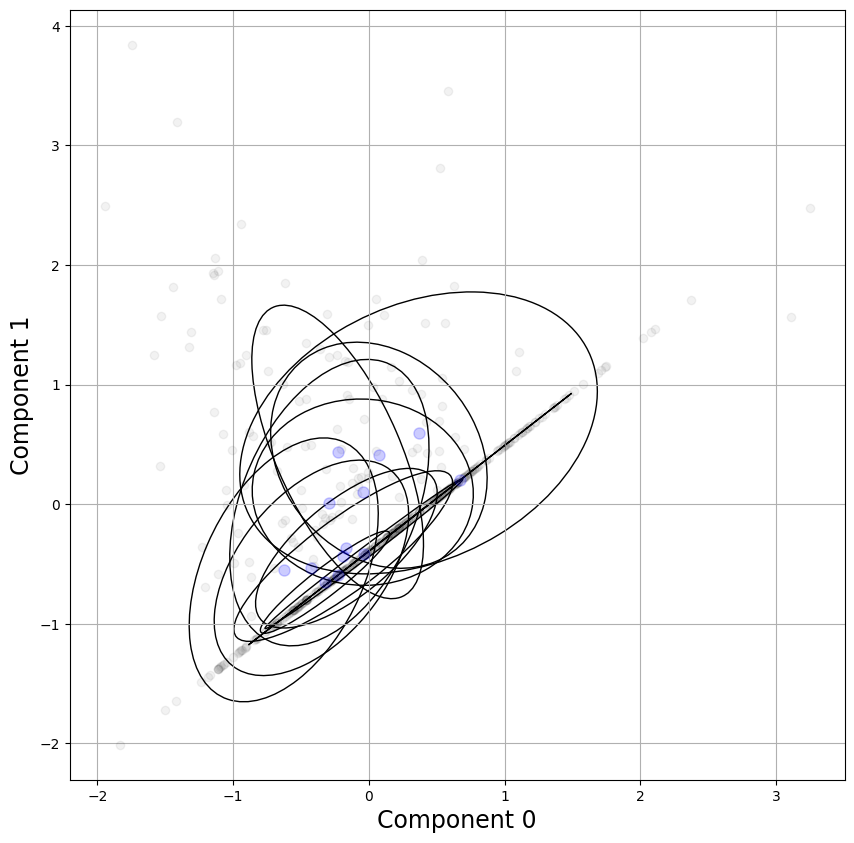

In [513]:
ellipse_plot(np.dot(X, r.params), dy["STUDY_PRTCPT_ID"], 0, 1)